In [3]:
import pandas as pd
import datetime as dt
import footballData as fd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
import time
import Elo as ELO
import seaborn as sns

In [4]:
df1888=pd.read_csv('englandthesis.csv')
df1888

/Users/andrewpuopolo/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0        Date  Season               home  \
0                1  1888-12-15    1888    Accrington F.C.   
1                2  1889-01-19    1888    Accrington F.C.   
2                3  1889-03-23    1888    Accrington F.C.   
3                4  1888-12-01    1888    Accrington F.C.   
4                5  1888-10-13    1888    Accrington F.C.   
5                6  1888-12-29    1888    Accrington F.C.   
6                7  1889-01-26    1888    Accrington F.C.   
7                8  1888-10-20    1888    Accrington F.C.   
8                9  1889-04-20    1888    Accrington F.C.   
9               10  1888-11-24    1888    Accrington F.C.   
10              11  1888-10-06    1888    Accrington F.C.   
11              12  1888-10-27    1888        Aston Villa   
12              13  1888-10-13    1888        Aston Villa   
13              14  1889-01-12    1888        Aston Villa   
14              15  1888-12-22    1888        Aston Villa   
15              16  1888-12-29    1888        Aston Villa   
16              17  1888-09-22    1888        Aston Villa   
17              18  1888-09-29    1888        Aston Villa   
18              19  1889-02-09    1888        Aston Villa   
19              20  1888-09-15    1888        Aston Villa   
20              21  1889-01-19    1888        Aston Villa   
21              22  1888-11-24    1888        Aston Villa   
22              23  1888-09-15    1888   Blackburn Rovers   
23              24  1888-11-17    1888   Blackburn Rovers   
24              25  1888-12-08    1888   Blackburn Rovers   
25              26  1889-02-04    1888   Blackburn Rovers   
26              27  1889-04-15    1888   Blackburn Rovers   
27              28  1888-11-10    1888   Blackburn Rovers   
28              29  1888-12-15    1888   Blackburn Rovers   
29              30  1889-01-12    1888   Blackburn Rovers   
...            ...         ...     ...                ...   
194010      194011  2017-04-22    2016  Hartlepool United   
194011      194012  2017-04-22    2016         Luton Town   
194012      194013  2017-04-22    2016     Newport County   
194013      194014  2017-04-22    2016         Portsmouth   
194014      194015  2017-04-22    2016  Stevenage Borough   
194015      194016  2017-04-22    2016  Wycombe Wanderers   
194016      194017  2017-04-29    2016         Accrington   
194017      194018  2017-04-29    2016             Barnet   
194018      194019  2017-04-29    2016   Cambridge United   
194019      194020  2017-04-29    2016    Carlisle United   
194020      194021  2017-04-29    2016         Cheltenham   
194021      194022  2017-04-29    2016   Doncaster Rovers   
194022      194023  2017-04-29    2016      Leyton Orient   
194023      194024  2017-04-29    2016     Mansfield Town   
194024      194025  2017-04-29    2016          Morecambe   
194025      194026  2017-04-29    2016       Notts County   
194026      194027  2017-04-29    2016    Plymouth Argyle   
194027      194028  2017-04-29    2016             Yeovil   
194028      194029  2017-05-06    2016          Blackpool   
194029      194030  2017-05-06    2016  Colchester United   
194030      194031  2017-05-06    2016       Crawley Town   
194031      194032  2017-05-06    2016    Crewe Alexandra   
194032      194033  2017-05-06    2016        Exeter City   
194033      194034  2017-05-06    2016       Grimsby Town   
194034      194035  2017-05-06    2016  Hartlepool United   
194035      194036  2017-05-06    2016         Luton Town   
194036      194037  2017-05-06    2016     Newport County   
194037      194038  2017-05-06    2016         Portsmouth   
194038      194039  2017-05-06    2016  Stevenage Borough   
194039      194040  2017-05-06    2016  Wycombe Wanderers   

                        visitor   FT  hgoal  vgoal division  tier  totgoal  \
0                   Aston Villa  1-1      1      1        1     1        2   
1              Blackburn Rovers  0-2      0      2        1     1    

In [5]:
startdate=1958
fulldf=df1888[df1888['Season']>=startdate]
fulldf=fulldf.sort_values('Date')
fulldf=fulldf.reset_index()
fulldf=fulldf.replace('Milton Keynes Dons', 'Wimbledon')
fulldf

index  Unnamed: 0        Date  Season                     home  \
0        75629       75630  1958-08-23    1958             Swindon Town   
1        75423       75424  1958-08-23    1958             Notts County   
2        75745       75746  1958-08-23    1958          Carlisle United   
3        75743       75744  1958-08-23    1958     Bradford Park Avenue   
4        74746       74747  1958-08-23    1958             Cardiff City   
5        75708       75709  1958-08-23    1958                   Barrow   
6        74337       74338  1958-08-23    1958                  Burnley   
7        74783       74784  1958-08-23    1958        Charlton Athletic   
8        74827       74828  1958-08-23    1958                   Fulham   
9        75637       75638  1958-08-23    1958          Tranmere Rovers   
10       74313       74314  1958-08-23    1958         Bolton Wanderers   
11       74857       74858  1958-08-23    1958        Huddersfield Town   
12       75371       75372  1958-08-23    1958           Mansfield Town   
13       75601       75602  1958-08-23    1958         Stockport County   
14       74896       74897  1958-08-23    1958            Leyton Orient   
15       74933       74934  1958-08-23    1958             Lincoln City   
16       74943       74944  1958-08-23    1958                Liverpool   
17       74957       74958  1958-08-23    1958            Middlesbrough   
18       75507       75508  1958-08-23    1958                  Reading   
19       75411       75412  1958-08-23    1958             Norwich City   
20       75008       75009  1958-08-23    1958        Scunthorpe United   
21       76177       76178  1958-08-23    1958                  Watford   
22       74718       74719  1958-08-23    1958             Bristol City   
23       75344       75345  1958-08-23    1958                Hull City   
24       75165       75166  1958-08-23    1958          AFC Bournemouth   
25       75798       75799  1958-08-23    1958            Coventry City   
26       74449       74450  1958-08-23    1958               Luton Town   
27       74480       74481  1958-08-23    1958        Manchester United   
28       75246       75247  1958-08-23    1958             Chesterfield   
29       75266       75267  1958-08-23    1958        Colchester United   
...        ...         ...         ...     ...                      ...   
119810  192935      192936  2017-05-07    2016  Wolverhampton Wanderers   
119811  192927      192928  2017-05-07    2016            Burton Albion   
119812  192925      192926  2017-05-07    2016                Brentford   
119813  192357      192358  2017-05-08    2016                  Chelsea   
119814  192358      192359  2017-05-10    2016              Southampton   
119815  192360      192361  2017-05-12    2016     West Bromwich Albion   
119816  192359      192360  2017-05-12    2016                  Everton   
119817  192361      192362  2017-05-13    2016          AFC Bournemouth   
119818  192362      192363  2017-05-13    2016          Manchester City   
119819  192363      192364  2017-05-13    2016            Middlesbrough   
119820  192364      192365  2017-05-13    2016               Stoke City   
119821  192365      192366  2017-05-13    2016               Sunderland   
119822  192366      192367  2017-05-14    2016           Crystal Palace   
119823  192367      192368  2017-05-14    2016        Tottenham Hotspur   
119824  192368      192369  2017-05-14    2016          West Ham United   
119825  192369      192370  2017-05-15    2016                  Chelsea   
119826  192370      192371  2017-05-16    2016                  Arsenal   
119827  192371      192372  2017-05-16    2016          Manchester City   
119828  192372      192373  2017-05-17    2016              Southampton   
119829  192373      192374  2017-05-18    2016           Leicester City   
119830  192378      192379  2017-05-21    2016           Leicester City   
119831  192379      192380  2017-0

In [6]:
def CalendarYear(Date):
    return int(Date.split('-')[0])
CalendarYear(fulldf['Date'][0])
def Month(Date):
    return int(Date.split('-')[1])
fulldf['CalendarYear']=fulldf.apply(lambda row: CalendarYear(row['Date']), axis=1)
fulldf['Month']=fulldf.apply(lambda row: Month(row['Date']), axis=1)
fulldf

index  Unnamed: 0        Date  Season                     home  \
0        75629       75630  1958-08-23    1958             Swindon Town   
1        75423       75424  1958-08-23    1958             Notts County   
2        75745       75746  1958-08-23    1958          Carlisle United   
3        75743       75744  1958-08-23    1958     Bradford Park Avenue   
4        74746       74747  1958-08-23    1958             Cardiff City   
5        75708       75709  1958-08-23    1958                   Barrow   
6        74337       74338  1958-08-23    1958                  Burnley   
7        74783       74784  1958-08-23    1958        Charlton Athletic   
8        74827       74828  1958-08-23    1958                   Fulham   
9        75637       75638  1958-08-23    1958          Tranmere Rovers   
10       74313       74314  1958-08-23    1958         Bolton Wanderers   
11       74857       74858  1958-08-23    1958        Huddersfield Town   
12       75371       75372  1958-08-23    1958           Mansfield Town   
13       75601       75602  1958-08-23    1958         Stockport County   
14       74896       74897  1958-08-23    1958            Leyton Orient   
15       74933       74934  1958-08-23    1958             Lincoln City   
16       74943       74944  1958-08-23    1958                Liverpool   
17       74957       74958  1958-08-23    1958            Middlesbrough   
18       75507       75508  1958-08-23    1958                  Reading   
19       75411       75412  1958-08-23    1958             Norwich City   
20       75008       75009  1958-08-23    1958        Scunthorpe United   
21       76177       76178  1958-08-23    1958                  Watford   
22       74718       74719  1958-08-23    1958             Bristol City   
23       75344       75345  1958-08-23    1958                Hull City   
24       75165       75166  1958-08-23    1958          AFC Bournemouth   
25       75798       75799  1958-08-23    1958            Coventry City   
26       74449       74450  1958-08-23    1958               Luton Town   
27       74480       74481  1958-08-23    1958        Manchester United   
28       75246       75247  1958-08-23    1958             Chesterfield   
29       75266       75267  1958-08-23    1958        Colchester United   
...        ...         ...         ...     ...                      ...   
119810  192935      192936  2017-05-07    2016  Wolverhampton Wanderers   
119811  192927      192928  2017-05-07    2016            Burton Albion   
119812  192925      192926  2017-05-07    2016                Brentford   
119813  192357      192358  2017-05-08    2016                  Chelsea   
119814  192358      192359  2017-05-10    2016              Southampton   
119815  192360      192361  2017-05-12    2016     West Bromwich Albion   
119816  192359      192360  2017-05-12    2016                  Everton   
119817  192361      192362  2017-05-13    2016          AFC Bournemouth   
119818  192362      192363  2017-05-13    2016          Manchester City   
119819  192363      192364  2017-05-13    2016            Middlesbrough   
119820  192364      192365  2017-05-13    2016               Stoke City   
119821  192365      192366  2017-05-13    2016               Sunderland   
119822  192366      192367  2017-05-14    2016           Crystal Palace   
119823  192367      192368  2017-05-14    2016        Tottenham Hotspur   
119824  192368      192369  2017-05-14    2016          West Ham United   
119825  192369      192370  2017-05-15    2016                  Chelsea   
119826  192370      192371  2017-05-16    2016                  Arsenal   
119827  192371      192372  2017-05-16    2016          Manchester City   
119828  192372      192373  2017-05-17    2016              Southampton   
119829  192373      192374  2017-05-18    2016           Leicester City   
119830  192378      192379  2017-05-21    2016           Leicester City   
119831  192379      192380  2017-0

In [7]:
import datetime
from datetime import datetime
def DT(Date):
    return datetime.strptime(Date, '%Y-%m-%d')
fulldf['Date']=fulldf.apply(lambda row: DT(row['Date']), axis=1)

def to_integer(current_time):
    return (current_time-fulldf['Date'][0]).days
fulldf['Day#']=fulldf.apply(lambda row: to_integer(row['Date']), axis=1)
fulldf

index  Unnamed: 0       Date  Season                     home  \
0        75629       75630 1958-08-23    1958             Swindon Town   
1        75423       75424 1958-08-23    1958             Notts County   
2        75745       75746 1958-08-23    1958          Carlisle United   
3        75743       75744 1958-08-23    1958     Bradford Park Avenue   
4        74746       74747 1958-08-23    1958             Cardiff City   
5        75708       75709 1958-08-23    1958                   Barrow   
6        74337       74338 1958-08-23    1958                  Burnley   
7        74783       74784 1958-08-23    1958        Charlton Athletic   
8        74827       74828 1958-08-23    1958                   Fulham   
9        75637       75638 1958-08-23    1958          Tranmere Rovers   
10       74313       74314 1958-08-23    1958         Bolton Wanderers   
11       74857       74858 1958-08-23    1958        Huddersfield Town   
12       75371       75372 1958-08-23    1958           Mansfield Town   
13       75601       75602 1958-08-23    1958         Stockport County   
14       74896       74897 1958-08-23    1958            Leyton Orient   
15       74933       74934 1958-08-23    1958             Lincoln City   
16       74943       74944 1958-08-23    1958                Liverpool   
17       74957       74958 1958-08-23    1958            Middlesbrough   
18       75507       75508 1958-08-23    1958                  Reading   
19       75411       75412 1958-08-23    1958             Norwich City   
20       75008       75009 1958-08-23    1958        Scunthorpe United   
21       76177       76178 1958-08-23    1958                  Watford   
22       74718       74719 1958-08-23    1958             Bristol City   
23       75344       75345 1958-08-23    1958                Hull City   
24       75165       75166 1958-08-23    1958          AFC Bournemouth   
25       75798       75799 1958-08-23    1958            Coventry City   
26       74449       74450 1958-08-23    1958               Luton Town   
27       74480       74481 1958-08-23    1958        Manchester United   
28       75246       75247 1958-08-23    1958             Chesterfield   
29       75266       75267 1958-08-23    1958        Colchester United   
...        ...         ...        ...     ...                      ...   
119810  192935      192936 2017-05-07    2016  Wolverhampton Wanderers   
119811  192927      192928 2017-05-07    2016            Burton Albion   
119812  192925      192926 2017-05-07    2016                Brentford   
119813  192357      192358 2017-05-08    2016                  Chelsea   
119814  192358      192359 2017-05-10    2016              Southampton   
119815  192360      192361 2017-05-12    2016     West Bromwich Albion   
119816  192359      192360 2017-05-12    2016                  Everton   
119817  192361      192362 2017-05-13    2016          AFC Bournemouth   
119818  192362      192363 2017-05-13    2016          Manchester City   
119819  192363      192364 2017-05-13    2016            Middlesbrough   
119820  192364      192365 2017-05-13    2016               Stoke City   
119821  192365      192366 2017-05-13    2016               Sunderland   
119822  192366      192367 2017-05-14    2016           Crystal Palace   
119823  192367      192368 2017-05-14    2016        Tottenham Hotspur   
119824  192368      192369 2017-05-14    2016          West Ham United   
119825  192369      192370 2017-05-15    2016                  Chelsea   
119826  192370      192371 2017-05-16    2016                  Arsenal   
119827  192371      192372 2017-05-16    2016          Manchester City   
119828  192372      192373 2017-05-17    2016              Southampton   
119829  192373      192374 2017-05-18    2016           Leicester City   
119830  192378      192379 2017-05-21    2016           Leicester City   
119831  192379      192380 2017-05-21    2016                Liverpool   
119832  19238

In [ ]:
initvalues=[1500,1500,1500,1500]
class Teams(object):
    initvalues=[1500,1500,1500,1500]

    def __init__(self, Name, Tier, year):
        self.team=Name
        self.league=Tier
        self.rating=initvalues[Tier-1]
        self.Rd=350
        self.LastMatch=fulldf['Date'][0]
        self.firstseason=year
    def __repr__(self):
        return str(self.team)+', '+str(self.league)+', '+str(self.rating)+', '+str(self.Rd)+', '+str(self.LastMatch)+', '+str(self.firstseason)

In [7]:
clubs=[]
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    Year=Teamdf['Season'][0]
    club=Teams(Team, Tier,Year)
    clubs.append(club)
print(clubs)

NameError: name 'Teams' is not defined

In [ ]:
fulldf

In [164]:
def UpdateRatingDev(Rd, Time, tau, maxrd):
    newRd=Rd
    for i in range(Time):
        newRd=min(maxrd, np.sqrt(newRd**2+tau**2))
    return newRd

In [47]:
fulldf['Date'][0]

Timestamp('1958-08-23 00:00:00')

In [10]:
import copy
from copy import deepcopy
def g(sigma2, q):
    return 1/np.sqrt(1+3*q**2*sigma2/(np.pi**2))

def E(r, rj, g, Home, HomeAway):
    return 1/(1+10**(-g*(r-rj+HomeAway*Home)/400))

def Res(HomeG, AwayG):
    if(HomeG>AwayG):
        return 1
    elif(AwayG>HomeG):
        return 0
    else:
        return .5
def insideD(g, E):
    return E*(1-E)*(g**2)

def d2(q, dlist):
    if dlist!=0:
        return 1/(q**2*dlist)
    else:
        return 10**10

def ratingupdate(rating, q, d, RD, sums):
    return rating+(q/(1/RD**2+1/d))*sums      
def rdupdate(rd, d):
    return np.sqrt(1/(1/rd**2+1/d))

def timeupdate(c, rd, maxrd):
    return min(np.sqrt(rd**2+c**2), maxrd)

def lik(E, R):
    if(R==1):
        return np.log(E)
    elif (R==.5):
        return np.log(np.sqrt(E*(1-E)))
    elif (R==0):
        return np.log(1-E)

initdictionary={}
initvalues=[1500,1500,1500,1500]
initialrows=[]
Rd=350


#This needs to be rewritten so we don't have to run it over an dover again
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    LastMatch=fulldf['Day#'][0]
    dcalc=0
    scalc=0
    initialrow=[Team,initvalues[Tier-1], Rd,Tier,  dcalc,scalc ]
    initialrows.append(initialrow)
#Needs to be rewritten to optimize using BuildEloDict Function
for a in range(len(initialrows)):
    initdictionary[initialrows[a][0]]=initialrows[a][1:]
import time
def Glickologlik(params):
    ratingperiodlength=7.0
    c=params['c']
    h=80
    hk=params['hk']
    #minrd=params['minrd']
    maxrd=params['maxrd']
    curtime=time.time()
    rows=len(fulldf)
    q=np.log(10)/400
    logliks=0.0
    hburn=10
    burn=25
    startyear=fulldf['Season'].values[0]
    startday=fulldf['Season']
    Glickodictionary=copy.deepcopy(initdictionary)
    for key in Glickodictionary:
        Glickodictionary[key][1]=maxrd
    currentyear=fulldf['Season'].values[0]
    startdate=fulldf['Date'][0]
    GameCounter=0.
    Rs=0.
    Es=0.
    totaltime=fulldf['Day#'][rows-1]-fulldf['Day#'][0]
    day=0.
    #print(Glickodictionary)
    while day<=totaltime:
        for key in Glickodictionary:
            Glickodictionary[key][1]=timeupdate(c, Glickodictionary[key][1], maxrd)
        ratingperioddf=fulldf[(fulldf['Day#'] >=day) & (fulldf['Day#']<day+ratingperiodlength)].reset_index()
        if len(ratingperioddf!=0):
            Rs=0.
            Es=0.

            for ind, row in ratingperioddf.iterrows():
                #print('sup')
                Home=row['home']
                Away=row['visitor']
                HomeGoals=row['hgoal']
                AwayGoals=row['vgoal']
                year=row['Season']
                Homestats=Glickodictionary[Home]
                Awaystats=Glickodictionary[Away]
                HomeRating=Homestats[0]
                AwayRating=Awaystats[0]
                HomeRd=Homestats[1]
                AwayRd=Awaystats[1]
                HomeG=g(AwayRd**2, q)
                AwayG=g(HomeRd**2, q)
                pG=g(HomeRd**2+AwayRd**2, q)
                HomeE=E(HomeRating, AwayRating, HomeG, h, 1)
                AwayE=E(AwayRating, HomeRating, AwayG, h, -1)
                pE=E(HomeRating, AwayRating, pG, h, 1)
                HRes=Res(HomeGoals, AwayGoals)
                ARes=Res(AwayGoals, HomeGoals)

                Glickodictionary[Home][4]+=HomeG*(HRes-HomeE)
                Glickodictionary[Away][4]+=AwayG*(ARes-AwayE)
                Glickodictionary[Home][3]+=insideD(HomeG, HomeE)
                Glickodictionary[Away][3]+=insideD(AwayG, AwayE)
                Rs+=HRes
                Es+=pE
                if(year>startyear+burn):
                    logliks+=lik(pE, HRes)
                    

            if(year>startyear+hburn):
                h+=hk*(Rs-Es)

            for key in Glickodictionary:
                Glickod=d2(q, Glickodictionary[key][3])
                Glickodictionary[key][0]=ratingupdate(Glickodictionary[key][0],q, Glickod, Glickodictionary[key][1], Glickodictionary[key][4])
                Glickodictionary[key][1]=rdupdate(Glickodictionary[key][1], Glickod)
                Glickodictionary[key][3]=0
                Glickodictionary[key][4]=0
        day+=ratingperiodlength
    print(params ,logliks,Glickodictionary['Tottenham Hotspur'][0], time.time()-curtime)
    #print(Glickodictionary)
    return -1*logliks

In [83]:
import time
timetime.time()

1547785629.184939

In [193]:
initdictionary

{'AFC Bournemouth': [1500, 350, 3, 0, 0],
 'AFC Wimbledon': [1200, 350, 4, 0, 0],
 'Accrington': [1200, 350, 4, 0, 0],
 'Accrington Stanley': [1500, 350, 3, 0, 0],
 'Aldershot': [1200, 350, 4, 0, 0],
 'Arsenal': [1500, 350, 1, 0, 0],
 'Aston Villa': [1500, 350, 1, 0, 0],
 'Barnet': [1200, 350, 4, 0, 0],
 'Barnsley': [1500, 350, 2, 0, 0],
 'Barrow': [1200, 350, 4, 0, 0],
 'Birmingham City': [1500, 350, 1, 0, 0],
 'Blackburn Rovers': [1500, 350, 1, 0, 0],
 'Blackpool': [1500, 350, 1, 0, 0],
 'Bolton Wanderers': [1500, 350, 1, 0, 0],
 'Boston United': [1200, 350, 4, 0, 0],
 'Bradford City': [1500, 350, 3, 0, 0],
 'Bradford Park Avenue': [1200, 350, 4, 0, 0],
 'Brentford': [1500, 350, 3, 0, 0],
 'Brighton & Hove Albion': [1500, 350, 2, 0, 0],
 'Bristol City': [1500, 350, 2, 0, 0],
 'Bristol Rovers': [1500, 350, 2, 0, 0],
 'Burnley': [1500, 350, 1, 0, 0],
 'Burton Albion': [1200, 350, 4, 0, 0],
 'Bury': [1500, 350, 3, 0, 0],
 'Cambridge United': [1200, 350, 4, 0, 0],
 'Cardiff City': [1500,

In [12]:
from hyperopt import hp
space = {
    #'ratingperiodlength': hp.quniform('ratingperiodlength', 2, 30, 1),
    'c': hp.uniform('c', 0, 40),
    #'h': hp.uniform('h', 50, 150),
    #get rid of this for now
    #'minrd': hp.uniform('minrd', 0, 60),
    'hk': hp.uniform('hk', 0, .25),
    'maxrd': hp.uniform('maxrd', 100, 350)
}

from hyperopt import tpe
# Algorithm
tpe_algorithm = tpe.suggest

from hyperopt import Trials
# Trials object to track progress
bayes_trials = Trials()

from hyperopt import fmin

MAX_EVALS = 1000

# Optimize
#bests=[]
for i in range (3):
    space = {
        #'ratingperiodlength': hp.quniform('ratingperiodlength', 2, 30, 1),
        'c': hp.uniform('c', 0, 40),
        #'h': hp.uniform('h', 50, 150),
        #get rid of this for now
        #'minrd': hp.uniform('minrd', 0, 60),
        'hk': hp.uniform('hk', 0, 1),
        'maxrd': hp.uniform('maxrd', 100, 350)
    }

    from hyperopt import tpe
    # Algorithm
    tpe_algorithm = tpe.suggest

    from hyperopt import Trials
    # Trials object to track progress
    bayes_trials = Trials()

    from hyperopt import fmin

    MAX_EVALS = 1000

    best = fmin(fn = Glickologlik, space = space, algo = tpe.suggest, 
            max_evals = MAX_EVALS, trials = bayes_trials)
    bests.append(best)

{'c': 3.498939312692717, 'hk': 0.4405686573850284, 'maxrd': 257.45529647082327} -44282.7994572 1858.97838529 25.09983491897583
{'c': 15.137170978944315, 'hk': 0.32096098735481393, 'maxrd': 213.7393388023214} -44422.3954803 2131.28047985 24.278944969177246
{'c': 4.127142434586837, 'hk': 0.09692664904473813, 'maxrd': 122.87980284700872} -44243.883016 1890.29573689 24.973776817321777
{'c': 8.46772276913606, 'hk': 0.2288721817627597, 'maxrd': 114.02150457465531} -44206.8507236 2025.52428244 24.97535991668701
{'c': 21.02697918649431, 'hk': 0.6198453396999996, 'maxrd': 108.55255266864869} -44657.7305181 2203.79414243 25.40235209465027
{'c': 15.639707731435761, 'hk': 0.10145735790991506, 'maxrd': 173.59353138845654} -44453.5335599 2141.92591527 24.8241868019104
{'c': 37.325604005013346, 'hk': 0.1850403702613459, 'maxrd': 340.9036425926662} -45528.4027203 2291.76646153 25.823668003082275
{'c': 7.440103164728402, 'hk': 0.4912236782911331, 'maxrd': 238.55692614491758} -44206.239115 1994.56590901

{'c': 8.16059294967449, 'hk': 0.4532433258355365, 'maxrd': 269.0019914897135} -44215.9298049 2011.40317017 26.31058096885681
{'c': 5.649502800036769, 'hk': 0.6061544877235137, 'maxrd': 259.2854035474839} -44213.5454464 1942.83211272 25.383026838302612
{'c': 6.887216374000067, 'hk': 0.3061837070893121, 'maxrd': 295.07447086187807} -44206.9074183 1978.98648114 25.482189178466797
{'c': 4.356573255065812, 'hk': 0.46382348836072373, 'maxrd': 233.84910776041843} -44241.1142963 1896.67431664 26.268393993377686
{'c': 6.959575814755771, 'hk': 0.37956631604786295, 'maxrd': 222.8358363355604} -44201.4338895 1982.32942608 25.9616858959198
{'c': 0.8094412804746058, 'hk': 0.21412582708851446, 'maxrd': 191.43087869356526} -44621.9888533 1659.24494173 25.93972396850586
{'c': 14.130958161987135, 'hk': 0.2792398897788831, 'maxrd': 218.98126255498138} -44382.4130589 2118.19111512 25.722756147384644
{'c': 8.485569970548715, 'hk': 0.3868977676403381, 'maxrd': 226.44753403763755} -44216.2707525 2020.0283673

{'c': 9.694848471633438, 'hk': 0.8660931433708847, 'maxrd': 100.33617500518108} -44238.5232299 2053.50694907 25.90367317199707
{'c': 13.019900968809958, 'hk': 0.003903274120540534, 'maxrd': 140.1111104558381} -44401.7640753 2117.63415331 23.036564111709595
{'c': 39.1312502666557, 'hk': 0.5950151224037956, 'maxrd': 204.80514498867905} -45601.8415164 2310.60151899 23.900147914886475
{'c': 5.612365695253839, 'hk': 0.18077661401365425, 'maxrd': 248.88834631819188} -44211.0158196 1942.17844028 25.00343084335327
{'c': 11.982660985204475, 'hk': 0.5514088613113949, 'maxrd': 115.4424173908487} -44300.7167696 2093.80490692 26.035146951675415
{'c': 6.740670934279904, 'hk': 0.1240154096584633, 'maxrd': 122.51699179081491} -44193.9961718 1981.20948594 26.107512950897217
{'c': 6.911248913276842, 'hk': 0.12197562545962365, 'maxrd': 335.8998687928633} -44214.0039908 1980.01014698 27.936536073684692
{'c': 3.586332392913051, 'hk': 0.05204278182205807, 'maxrd': 124.0714368066001} -44285.3746136 1866.8480

{'c': 12.28209774650174, 'hk': 0.4729244792745292, 'maxrd': 149.0634827663371} -44310.0926902 2095.64912452 22.952867031097412
{'c': 5.595730373702402, 'hk': 0.5125187645688186, 'maxrd': 130.6830431147911} -44200.4618618 1944.36265848 24.628132820129395
{'c': 7.81864661453759, 'hk': 0.6227231365992496, 'maxrd': 143.60294930708352} -44201.2011081 2007.91256354 23.5553719997406
{'c': 13.74583223488523, 'hk': 0.6637846047131086, 'maxrd': 158.29638230657028} -44365.8588898 2116.7950011 24.75026297569275
{'c': 3.6193723097222272, 'hk': 0.5496610676475703, 'maxrd': 138.18500100501393} -44266.7285828 1866.14218129 25.135530948638916
{'c': 2.4344249709570196, 'hk': 0.26557572380504013, 'maxrd': 116.43181644217464} -44351.3765617 1801.40503242 23.73513388633728
{'c': 10.615836141241509, 'hk': 0.3917212867268551, 'maxrd': 100.13176644785906} -44257.8696637 2071.25251977 24.91225004196167
{'c': 24.69473190821118, 'hk': 0.4145198840732418, 'maxrd': 166.00578156038858} -44868.4176263 2225.69348179 

{'c': 8.814011879788085, 'hk': 0.49642821962521394, 'maxrd': 107.59945166988432} -44214.144962 2033.67872475 24.431971788406372
{'c': 7.3391766306528226, 'hk': 0.4652061179858099, 'maxrd': 100.0963571754883} -44193.8974488 1998.09866858 26.24679398536682
{'c': 9.973806975635544, 'hk': 0.4485273663890215, 'maxrd': 119.6429240083215} -44239.4069229 2057.17078314 23.179874897003174
{'c': 2.888567365407326, 'hk': 0.5156118212602118, 'maxrd': 132.27121239626126} -44314.6941087 1828.59900711 22.978184938430786
{'c': 3.7608475591765194, 'hk': 0.5754483513137696, 'maxrd': 114.24787449935175} -44256.7673715 1873.25730812 24.92605185508728
{'c': 6.0008629791371115, 'hk': 0.543846904834434, 'maxrd': 103.7205974635418} -44193.7260962 1958.9724689 24.74915099143982
{'c': 4.677276067834595, 'hk': 0.4374836740994271, 'maxrd': 140.82211567032763} -44221.0940977 1911.05356383 23.5605149269104
{'c': 12.038849738374397, 'hk': 0.48159740455499334, 'maxrd': 128.35717452142143} -44301.5372761 2093.47534675 

{'c': 22.959229980857852, 'hk': 0.42561759830718643, 'maxrd': 108.11435896046957} -44716.1551174 2218.05530836 25.78622007369995
{'c': 30.026663843320634, 'hk': 0.31419948285025756, 'maxrd': 298.9719048450428} -45145.7510209 2252.07226896 23.531656980514526
{'c': 0.06221914736911405, 'hk': 0.43976654984926444, 'maxrd': 231.9251654121404} -44868.3079517 1594.03837256 26.922050952911377
{'c': 7.540607568152354, 'hk': 0.36528148878274364, 'maxrd': 249.77108217638326} -44206.9347243 1996.85904726 25.55516791343689
{'c': 13.89998615955496, 'hk': 0.1544723322932044, 'maxrd': 125.48317171924705} -44373.5970744 2122.54364574 24.32530403137207
{'c': 3.8007135899353117, 'hk': 0.29693332738340267, 'maxrd': 190.6799945509232} -44259.9066954 1873.7221807 31.4794659614563
{'c': 7.06408870304487, 'hk': 0.18471464020683487, 'maxrd': 195.99285749217893} -44199.6513319 1986.3720472 26.946409940719604
{'c': 8.828831825203107, 'hk': 0.23258949804172643, 'maxrd': 116.38653023406691} -44213.3047339 2033.583

{'c': 7.06904371967517, 'hk': 0.10701961571715549, 'maxrd': 158.33598899393712} -44200.8252899 1988.74942197 25.120795965194702
{'c': 0.9035465574429598, 'hk': 0.2651165415480448, 'maxrd': 130.28886686028318} -44593.960804 1669.22766465 25.163865089416504
{'c': 9.260355884695858, 'hk': 0.4372654017759563, 'maxrd': 169.36572652706354} -44224.7697815 2039.44368909 25.02341604232788
{'c': 5.320256223968016, 'hk': 0.36161429342390755, 'maxrd': 100.32621410688586} -44200.1834016 1936.4279866 25.04455590248108
{'c': 14.075356260061566, 'hk': 0.21903725344357539, 'maxrd': 124.6159184461129} -44377.6077167 2124.53028377 24.49778985977173
{'c': 11.705075107148026, 'hk': 0.37589454020808266, 'maxrd': 146.19193593785158} -44290.012476 2086.51736719 24.657095193862915
{'c': 4.648823009566517, 'hk': 0.34410605468043515, 'maxrd': 140.5261608096861} -44221.1012714 1909.99701721 24.878402709960938
{'c': 8.204773786688857, 'hk': 0.40656679471428786, 'maxrd': 116.85605191597514} -44202.8357211 2018.8524

{'c': 9.142598435832163, 'hk': 0.22988862802752533, 'maxrd': 135.69612745538657} -44219.9178986 2039.1429548 29.6207537651062
{'c': 11.075757999273515, 'hk': 0.04243889069516121, 'maxrd': 141.62843494342502} -44307.4583503 2080.79127226 28.413148880004883
{'c': 5.996418937353432, 'hk': 0.10862429335115006, 'maxrd': 122.27144738870362} -44198.4138291 1958.90531452 27.526068210601807
{'c': 7.567412571216524, 'hk': 0.21116615443592937, 'maxrd': 110.86479027527352} -44194.993316 2003.70127062 28.377264976501465
{'c': 10.115068764094337, 'hk': 0.3333540685656865, 'maxrd': 104.24101763772809} -44243.1461533 2061.36013505 27.879215717315674
{'c': 31.36106477866593, 'hk': 0.2512173992624398, 'maxrd': 114.60164437944863} -45013.3298346 2261.13137573 28.344548225402832
{'c': 4.6593281805870985, 'hk': 0.15654817253440442, 'maxrd': 127.1967765919616} -44220.2829996 1911.29394203 26.776591062545776
{'c': 0.7119881020347076, 'hk': 0.18202855310713567, 'maxrd': 145.25774069775468} -44645.6374591 1647

{'c': 14.402128850531323, 'hk': 0.4468958177806307, 'maxrd': 137.86568107192858} -44389.2109382 2127.41122653 27.569820165634155
{'c': 11.351772290412068, 'hk': 0.31159549390893704, 'maxrd': 148.7624014411039} -44278.6723957 2080.41889053 27.43231725692749
{'c': 6.7058905388265275, 'hk': 0.2289041419930738, 'maxrd': 130.58135105652323} -44191.079339 1979.02843753 28.395815134048462
{'c': 9.48714674371898, 'hk': 0.3922293802818228, 'maxrd': 110.5635878737226} -44227.3939366 2048.02310073 29.208406925201416
{'c': 1.8049510797835593, 'hk': 0.21824494126503963, 'maxrd': 284.75100992830926} -44438.9834918 1755.85929038 27.860250234603882
{'c': 16.431922612925923, 'hk': 0.2716177629121723, 'maxrd': 104.94316231068709} -44478.3247866 2156.32032805 28.2695472240448
{'c': 3.9421378726488476, 'hk': 0.3472427545504543, 'maxrd': 141.27043918209495} -44248.3941669 1880.81411241 29.96040987968445
{'c': 38.53262540132864, 'hk': 0.29687243674123703, 'maxrd': 122.62101210463005} -45238.415945 2290.2699

{'c': 7.938699780086422, 'hk': 0.2929004386771817, 'maxrd': 100.06144971941896} -44199.1283756 2013.65828578 26.640565156936646
{'c': 9.044560352593495, 'hk': 0.26911090836582996, 'maxrd': 124.6102149212891} -44217.3151574 2037.64548461 31.390395879745483
{'c': 4.739212333376255, 'hk': 0.21773433839494194, 'maxrd': 116.65651184145165} -44215.4740008 1914.48849043 33.24938988685608
{'c': 6.34035359214224, 'hk': 0.24721726434954927, 'maxrd': 104.76845418328695} -44189.9583217 1969.60724265 28.276055097579956
{'c': 4.319039818304887, 'hk': 0.23786971197451678, 'maxrd': 104.98917796647136} -44228.0054737 1898.09351142 30.325143098831177
{'c': 6.065831463282759, 'hk': 0.19063526957917296, 'maxrd': 104.3627351556442} -44191.7870837 1961.35752376 27.192278146743774
{'c': 5.980253565758781, 'hk': 0.2459989790440009, 'maxrd': 100.33354260442431} -44191.7915552 1958.65840489 32.09345602989197
{'c': 3.5629620609026422, 'hk': 0.2057920003358155, 'maxrd': 110.67916965653113} -44264.2780796 1864.240

{'c': 4.8060344742637655, 'hk': 0.3165958203895839, 'maxrd': 112.07646598389489} -44213.0711073 1917.04622308 25.269447803497314
{'c': 8.789304247836974, 'hk': 0.24552070712947013, 'maxrd': 118.37308790615842} -44212.4080029 2032.50944573 25.37949013710022
{'c': 8.047960001262753, 'hk': 0.352359953851234, 'maxrd': 105.06694025424103} -44200.4939528 2015.91169161 24.050278902053833
{'c': 5.800193400868533, 'hk': 0.3821929525437242, 'maxrd': 209.0466449955058} -44204.8671743 1948.57835205 23.433149814605713
{'c': 3.556807833837572, 'hk': 0.49781046569983245, 'maxrd': 129.32847189386393} -44268.6172726 1863.32478076 23.524991273880005
{'c': 9.521047298398443, 'hk': 0.29735395100374323, 'maxrd': 123.90495866999231} -44227.6597198 2047.76071562 23.61761999130249
{'c': 2.3992602118917166, 'hk': 0.2700438823996691, 'maxrd': 100.6582994890155} -44353.2507455 1799.17929647 23.83660387992859
{'c': 6.185707194119374, 'hk': 0.2002420977877028, 'maxrd': 111.6670825962741} -44191.0332304 1964.686250

{'c': 9.415419583696739, 'hk': 0.2794492507421827, 'maxrd': 100.37317020771648} -44226.1462933 2047.52983543 28.679258823394775
{'c': 2.8092762025553477, 'hk': 0.07538262225324419, 'maxrd': 135.18938780797237} -44329.3338127 1825.14361414 29.989140033721924
{'c': 36.95857097148321, 'hk': 0.14966135060251906, 'maxrd': 104.9464856473074} -44903.5335689 2241.15417746 27.728688955307007
{'c': 8.545695134482017, 'hk': 0.2888474975173049, 'maxrd': 141.7005216609861} -44208.4834951 2025.41290398 25.937957763671875
{'c': 5.273563808580136, 'hk': 0.2305320393336791, 'maxrd': 100.00862015980832} -44200.7188357 1934.98189309 26.734649181365967
{'c': 1.3596710209603655, 'hk': 0.24942488420732883, 'maxrd': 100.08957632495962} -44495.2902572 1716.60570377 26.83887505531311
{'c': 6.271604654855655, 'hk': 0.1771633937034769, 'maxrd': 126.59030260612892} -44192.5845285 1966.60104943 27.545254230499268
{'c': 4.277751955066435, 'hk': 0.12616609026861375, 'maxrd': 118.77209234821099} -44234.0693588 1896.4

{'c': 7.728561556864918, 'hk': 0.22495780979411742, 'maxrd': 105.39536116531458} -44196.6298128 2008.15114343 26.32296085357666
{'c': 6.8057357979833855, 'hk': 0.33731202511532743, 'maxrd': 125.78456740659115} -44190.5343159 1981.96770914 25.846904039382935
{'c': 9.443128365130029, 'hk': 0.29494662469988187, 'maxrd': 264.22950756292886} -44237.4318451 2039.47265451 24.382967948913574
{'c': 4.966216523947191, 'hk': 0.1251789265660035, 'maxrd': 115.65855888038261} -44212.3747434 1923.63808203 25.57412075996399
{'c': 11.977926866059656, 'hk': 0.3636141139738335, 'maxrd': 144.73916244903273} -44298.9824318 2091.1237302 28.268439054489136
{'c': 4.097403008446619, 'hk': 0.15410351167952782, 'maxrd': 111.09516044313794} -44238.9331519 1888.81528209 22.418168783187866
{'c': 10.156685065751219, 'hk': 0.18616489193763044, 'maxrd': 100.3981452962932} -44246.1583775 2062.98122104 21.959677934646606
{'c': 8.492946612718711, 'hk': 0.01773001962457227, 'maxrd': 129.32868380048126} -44274.6313787 2032

{'c': 4.72123603357345, 'hk': 0.31116857929335795, 'maxrd': 104.34908551062334} -44214.5973874 1914.12662789 21.46857714653015
{'c': 5.976119502088087, 'hk': 0.3444603594080519, 'maxrd': 144.8036861329142} -44196.0177024 1956.14780451 20.995441913604736
{'c': 8.63515262611006, 'hk': 0.2810783622815345, 'maxrd': 116.44716708256335} -44209.4064267 2029.0683907 21.373265743255615
{'c': 11.299035597992198, 'hk': 0.3851360743962292, 'maxrd': 110.02066893491094} -44277.4129768 2082.71374272 21.23077392578125
{'c': 12.866908069623243, 'hk': 0.1604914351015484, 'maxrd': 129.68229949546296} -44333.4227077 2107.11677885 21.224194765090942
{'c': 2.7843329160296877, 'hk': 0.2420863346161293, 'maxrd': 136.7956703605583} -44321.337107 1822.70850921 21.191641092300415
{'c': 7.729956108518918, 'hk': 0.41831149083863894, 'maxrd': 100.05702937717084} -44197.2054346 2008.30358951 21.230730056762695
{'c': 6.8973272332189035, 'hk': 0.14024735557108559, 'maxrd': 112.05310962153386} -44192.8953928 1986.02490

{'c': 2.1815547589584936, 'hk': 0.16940272371063314, 'maxrd': 124.66311656573434} -44379.870584 1784.52469906 19.27627682685852
{'c': 4.259605600163996, 'hk': 0.2559953389333196, 'maxrd': 135.06620296744634} -44233.6893086 1894.6495206 19.420719861984253
{'c': 6.221084891323527, 'hk': 0.14423324449650288, 'maxrd': 120.46944960500026} -44193.5153623 1965.6276979 19.218477964401245
{'c': 1.2937574109828125, 'hk': 0.23077646103664706, 'maxrd': 106.5303010123408} -44508.0649504 1710.29675904 19.811519145965576
{'c': 9.698521714721473, 'hk': 0.3718833711236526, 'maxrd': 100.40064524185784} -44232.9923817 2053.31873564 19.33566188812256
{'c': 24.15575578825641, 'hk': 0.35028223232207567, 'maxrd': 242.91963277299007} -44844.9129769 2215.462742 19.292857885360718
{'c': 3.683944991571433, 'hk': 0.3044456353639051, 'maxrd': 152.5424990095966} -44262.2441113 1868.96015647 19.26557493209839
{'c': 11.225734580710096, 'hk': 0.1904739757832322, 'maxrd': 114.50177248416487} -44276.2221485 2081.4936131

{'c': 2.132107940102979, 'hk': 0.16111358621665295, 'maxrd': 118.50030674488137} -44385.1440085 1781.05590038 19.290483951568604
{'c': 7.001896509378008, 'hk': 0.25650781315898125, 'maxrd': 285.8605109812821} -44206.5362246 1982.31814055 19.25202512741089
{'c': 5.7515218982773195, 'hk': 0.31034705828292275, 'maxrd': 129.97327839932262} -44196.529658 1949.61193377 19.257056951522827
{'c': 8.879547637578037, 'hk': 0.2835216906335152, 'maxrd': 100.04468773876903} -44214.6899039 2035.88303232 19.863236904144287
{'c': 4.015345640636204, 'hk': 0.18569262760786864, 'maxrd': 171.6150416142554} -44248.3136831 1883.72345866 19.986236095428467
{'c': 7.753883596511654, 'hk': 0.3968347568702888, 'maxrd': 113.88317032575246} -44196.9139151 2007.95750189 19.289002180099487
{'c': 22.348964566449066, 'hk': 0.14668686052871543, 'maxrd': 104.78281371018079} -44691.0368721 2214.10344677 19.28280806541443
{'c': 2.6655258612096153, 'hk': 0.08553599015481428, 'maxrd': 330.0556524561253} -44353.6657165 1815.3

NameError: name 'bests' is not defined

In [ ]:
for i in range(len(bests)):
    Glickologlik(bests[i])

In [270]:
bestparams=bests[7]

In [191]:
#E(r, rj, g, Home, HomeAway):
E(2000, 1400, .8, 100, 1)

0.9617134961177454

In [216]:
Glickologlik(best)

{'c': 3.8049004839794978, 'h': 50.07691971109392, 'hk': 0.014885986162615071, 'maxrd': 271.39848349181904, 'minrd': 33.13256525284871, 'ratingperiodlength': 2.0} -44884.5087814 1906.4976167 42.24753713607788


44884.508781374941

In [247]:
initdictionary={}
initvalues=[1500,1500,1500,1500]
initialrows=[]
Rd=350


#This needs to be rewritten so we don't have to run it over an dover again
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    LastMatch=fulldf['Day#'][0]
    dcalc=0
    scalc=0
    initialrow=[Team,initvalues[Tier-1], Rd,Tier,  dcalc,scalc ]
    initialrows.append(initialrow)
#Needs to be rewritten to optimize using BuildEloDict Function
for a in range(len(initialrows)):
    initdictionary[initialrows[a][0]]=initialrows[a][1:]
import time
def Glickologlik1st(params):
    ratingperiodlength=params['ratingperiodlength']
    c=params['c']
    h=params['h']
    hk=params['hk']
    minrd=params['minrd']
    maxrd=params['maxrd']
    curtime=time.time()
    rows=len(fulldf)
    q=np.log(10)/400
    logliks=0.0
    hburn=10
    burn=25
    startyear=fulldf['Season'].values[0]
    startday=fulldf['Season']
    Glickodictionary=copy.deepcopy(initdictionary)
    for key in Glickodictionary:
        Glickodictionary[key][1]=maxrd
    currentyear=fulldf['Season'].values[0]
    startdate=fulldf['Date'][0]
    GameCounter=0.
    Rs=0.
    Es=0.
    games=0
    totaltime=fulldf['Day#'][rows-1]-fulldf['Day#'][0]
    day=0.
    HFcounter=0
    #print(Glickodictionary)
    while day<=totaltime:
        for key in Glickodictionary:
            Glickodictionary[key][1]=timeupdate(c, Glickodictionary[key][1], maxrd, minrd)
        ratingperioddf=fulldf[(fulldf['Day#'] >=day) & (fulldf['Day#']<day+ratingperiodlength)].reset_index()
        if len(ratingperioddf!=0):
            Rs=0.
            Es=0.


            for ind, row in ratingperioddf.iterrows():
                #print('sup')
                Home=row['home']
                Away=row['visitor']
                HomeGoals=row['hgoal']
                AwayGoals=row['vgoal']
                year=row['Season']
                Division=row['tier']
                Homestats=Glickodictionary[Home]
                Awaystats=Glickodictionary[Away]
                HomeRating=Homestats[0]
                AwayRating=Awaystats[0]
                HomeRd=Homestats[1]
                AwayRd=Awaystats[1]
                HomeG=g(AwayRd**2, q)
                AwayG=g(HomeRd**2, q)
                pG=g(HomeRd**2+AwayRd**2, q)
                HomeE=E(HomeRating, AwayRating, HomeG, h, 1)
                AwayE=E(AwayRating, HomeRating, AwayG, h, -1)
                pE=E(HomeRating, AwayRating, pG, h, 1)
                HRes=Res(HomeGoals, AwayGoals)
                ARes=Res(AwayGoals, HomeGoals)

                Glickodictionary[Home][4]+=HomeG*(HRes-HomeE)
                Glickodictionary[Away][4]+=AwayG*(ARes-AwayE)
                Glickodictionary[Home][3]+=insideD(HomeG, HomeE)
                Glickodictionary[Away][3]+=insideD(AwayG, AwayE)
                Rs+=HRes
                Es+=pE
                if(year>startyear+hburn):
                    Rs+=HRes
                    Es+=pE
                if(year>(startyear+burn)):
                    if(Division==1):
                        logliks+=lik(pE, HRes)
                        games+=1

            if(year>startyear+hburn):
                    h+=hk*(Rs-Es)
                    Rs=0
                    Es=0
        
            for key in Glickodictionary:
                Glickod=d2(q, Glickodictionary[key][3])
                Glickodictionary[key][0]=ratingupdate(Glickodictionary[key][0],q, Glickod, Glickodictionary[key][1], Glickodictionary[key][4])
                Glickodictionary[key][1]=max(rdupdate(Glickodictionary[key][1], Glickod), minrd)
                Glickodictionary[key][3]=0
                Glickodictionary[key][4]=0
        day+=ratingperiodlength
    print(params, h,  logliks,Glickodictionary['Tottenham Hotspur'][0], time.time()-curtime)
    #print(Glickodictionary)
    return -1*logliks

In [ ]:
from hyperopt import hp
space = {
    'ratingperiodlength': hp.quniform('ratingperiodlength', 2, 30, 1),
    'c': hp.uniform('c', 0, 40),
    'h': hp.uniform('h', 50, 150),
    'minrd': hp.uniform('minrd', 0, 60),
    'hk': hp.uniform('hk', 0, 1),
    'maxrd': hp.uniform('maxrd', 100, 350)
}

from hyperopt import tpe
# Algorithm
tpe_algorithm = tpe.suggest

from hyperopt import Trials
# Trials object to track progress
bayes_trials = Trials()

from hyperopt import fmin

MAX_EVALS = 1000

# Optimize
best1st = fmin(fn = Glickologlik1st, space = space, algo = tpe.suggest, 
            max_evals = MAX_EVALS, trials = bayes_trials)

In [250]:
Glickologlik1st(best1st)

{'c': 6.120609363137652, 'h': 64.13839948703523, 'hk': 0.0043050493338048805, 'maxrd': 157.77411751653858, 'minrd': 34.156014463807395, 'ratingperiodlength': 6.0} 71.2132464646 -8307.14877134 1979.73362308 21.977819681167603


8307.1487713368206

In [ ]:
{'c': 5.171950151671853,
 'h': 55.715244644907735,
 'hk': 0.010374446376737713,
 'maxrd': 112.26746220521687,
 'minrd': 10.589017750691777,
 'ratingperiodlength': 4.0}

from hyperopt import hp
space = {
    #fix this for now
    'ratingperiodlength': hp.quniform('ratingperiodlength', 2, 50, 1),
    'c': hp.uniform('c', 0, 40),
    'h': hp.uniform('h', 50, 150),
    'minrd': hp.uniform('minrd', 0, 60),
    'hk': hp.uniform('hk', 0, .25),
    'maxrd': hp.uniform('maxrd', 100, 350)
}

from hyperopt import tpe
# Algorithm
tpe_algorithm = tpe.suggest

from hyperopt import Trials
# Trials object to track progress
bayes_trials = Trials()

from hyperopt import fmin

MAX_EVALS = 500

# Optimize
best = fmin(fn = Glickologlik, space = space, algo = tpe.suggest, 
            max_evals = MAX_EVALS, trials = bayes_trials)

In [251]:
best

{'c': 5.171950151671853,
 'h': 55.715244644907735,
 'hk': 0.010374446376737713,
 'maxrd': 112.26746220521687,
 'minrd': 10.589017750691777,
 'ratingperiodlength': 4.0}

In [253]:
best1st

{'c': 6.120609363137652,
 'h': 64.13839948703523,
 'hk': 0.0043050493338048805,
 'maxrd': 157.77411751653858,
 'minrd': 34.156014463807395,
 'ratingperiodlength': 6.0}

In [616]:
import copy
from copy import deepcopy
def g(sigma2, q):
    return 1/np.sqrt(1+3*q**2*sigma2/(np.pi**2))

def E(r, rj, g, Home, HomeAway):
    return 1/(1+10**(-g*(r-rj+HomeAway*Home)/400))

def Res(HomeG, AwayG):
    if(HomeG>AwayG):
        return 1
    elif(AwayG>HomeG):
        return 0
    else:
        return .5
def insideD(g, E):
    return E*(1-E)*(g**2)

def d2(q, dlist):
    if dlist!=0:
        return 1/(q**2*dlist)
    else:
        return 10**10

def ratingupdate(rating, q, d, RD, sums):
    return rating+(q/(1/RD**2+1/d))*sums      
def rdupdate(rd, d):
    return np.sqrt(1/(1/rd**2+1/d))

def timeupdate(c, rd, maxrd):
    return min(np.sqrt(rd**2+c**2), maxrd)

def lik(E, R):
    if(R==1):
        return np.log(E)
    elif (R==.5):
        return np.log(np.sqrt(E*(1-E)))
    elif (R==0):
        return np.log(1-E)

initdictionary={}
initvalues=[1500,1500,1500,1500]
initialrows=[]
Rd=350


#This needs to be rewritten so we don't have to run it over an dover again
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    LastMatch=fulldf['Day#'][0]
    dcalc=0
    scalc=0
    initialrow=[Team,initvalues[Tier-1], Rd,Tier,  dcalc,scalc ]
    initialrows.append(initialrow)
#Needs to be rewritten to optimize using BuildEloDict Function
for a in range(len(initialrows)):
    initdictionary[initialrows[a][0]]=initialrows[a][1:]
import time
def Glickologlikplots(params):
    LeicesterRd=[]
    ratingperiodlength=7.0
    c=params['c']
    h=80
    hk=params['hk']
    #minrd=params['minrd']
    maxrd=params['maxrd']
    curtime=time.time()
    rows=len(fulldf)
    q=np.log(10)/400
    logliks=0.0
    hburn=10
    burn=25
    startyear=fulldf['Season'].values[0]
    startday=fulldf['Season']
    Glickodictionary=copy.deepcopy(initdictionary)
    for key in Glickodictionary:
        Glickodictionary[key][1]=maxrd
    currentyear=fulldf['Season'].values[0]
    startdate=fulldf['Date'][0]
    GameCounter=0.
    Rs=0.
    Es=0.
    totaltime=fulldf['Day#'][rows-1]-fulldf['Day#'][0]
    day=0.
    #print(Glickodictionary)
    Glickopreds=[]
    homes=[]
    Teamrows=[]
    while day<=totaltime:
        for key in Glickodictionary:
            Glickodictionary[key][1]=timeupdate(c, Glickodictionary[key][1], maxrd)
        ratingperioddf=fulldf[(fulldf['Day#'] >=day) & (fulldf['Day#']<day+ratingperiodlength)].reset_index()
        if len(ratingperioddf!=0):
            Rs=0.
            Es=0.

            for ind, row in ratingperioddf.iterrows():
                #print('sup')
                Home=row['home']
                Away=row['visitor']
                HomeGoals=row['hgoal']
                AwayGoals=row['vgoal']
                year=row['Season']
                date=row['Date']
                Homestats=Glickodictionary[Home]
                Awaystats=Glickodictionary[Away]
                HomeRating=Homestats[0]
                AwayRating=Awaystats[0]
                HomeRd=Homestats[1]
                AwayRd=Awaystats[1]
                HomeG=g(AwayRd**2, q)
                AwayG=g(HomeRd**2, q)
                pG=g(HomeRd**2+AwayRd**2, q)
                HomeE=E(HomeRating, AwayRating, HomeG, h, 1)
                AwayE=E(AwayRating, HomeRating, AwayG, h, -1)
                pE=E(HomeRating, AwayRating, pG, h, 1)
                HRes=Res(HomeGoals, AwayGoals)
                ARes=Res(AwayGoals, HomeGoals)

                Glickodictionary[Home][4]+=HomeG*(HRes-HomeE)
                Glickodictionary[Away][4]+=AwayG*(ARes-AwayE)
                Glickodictionary[Home][3]+=insideD(HomeG, HomeE)
                Glickodictionary[Away][3]+=insideD(AwayG, AwayE)
                Rs+=HRes
                Es+=pE
                if(year>startyear+burn):
                    logliks+=lik(pE, HRes)
                    Glickopreds.append([Home, Away, HomeGoals, AwayGoals, HomeRating, AwayRating, HRes, pE])

                if(year>startyear+hburn):
                    homes.append([date, h])
                    h+=hk*(Rs-Es)
            maxvals=0
            minvals=10000
            for key in Glickodictionary:
                Glickod=d2(q, Glickodictionary[key][3])
                Glickodictionary[key][0]=ratingupdate(Glickodictionary[key][0],q, Glickod, Glickodictionary[key][1], Glickodictionary[key][4])
                Glickodictionary[key][1]=rdupdate(Glickodictionary[key][1], Glickod)
                Glickodictionary[key][3]=0
                Glickodictionary[key][4]=0
                maxvals=max(Glickodictionary[key][0], maxvals)
                minvals=min(Glickodictionary[key][0], minvals)
        Teamrows.append([date, maxvals, minvals, Glickodictionary['Arsenal'][0], Glickodictionary['Leeds United'][0],
                         Glickodictionary['Middlesbrough'][0], Glickodictionary['Brentford'][0], Glickodictionary['Exeter City'][0]] 
                         )
        day+=ratingperiodlength
        print(Glickodictionary['Leicester City'][1], date, year)
        LeicesterRd.append([Glickodictionary['Leicester City'][0], Glickodictionary['Leicester City'][1], date, year])
    print(params ,logliks,Glickodictionary['Tottenham Hotspur'][0], time.time()-curtime)
    #print(Glickodicnary)
    return Teamrows

In [515]:
initdictionary

{'AFC Bournemouth': [1500, 350, 3, 0, 0],
 'AFC Wimbledon': [1500, 350, 4, 0, 0],
 'Accrington': [1500, 350, 4, 0, 0],
 'Accrington Stanley': [1500, 350, 3, 0, 0],
 'Aldershot': [1500, 350, 4, 0, 0],
 'Arsenal': [1500, 350, 1, 0, 0],
 'Aston Villa': [1500, 350, 1, 0, 0],
 'Barnet': [1500, 350, 4, 0, 0],
 'Barnsley': [1500, 350, 2, 0, 0],
 'Barrow': [1500, 350, 4, 0, 0],
 'Birmingham City': [1500, 350, 1, 0, 0],
 'Blackburn Rovers': [1500, 350, 1, 0, 0],
 'Blackpool': [1500, 350, 1, 0, 0],
 'Bolton Wanderers': [1500, 350, 1, 0, 0],
 'Boston United': [1500, 350, 4, 0, 0],
 'Bradford City': [1500, 350, 3, 0, 0],
 'Bradford Park Avenue': [1500, 350, 4, 0, 0],
 'Brentford': [1500, 350, 3, 0, 0],
 'Brighton & Hove Albion': [1500, 350, 2, 0, 0],
 'Bristol City': [1500, 350, 2, 0, 0],
 'Bristol Rovers': [1500, 350, 2, 0, 0],
 'Burnley': [1500, 350, 1, 0, 0],
 'Burton Albion': [1500, 350, 4, 0, 0],
 'Bury': [1500, 350, 3, 0, 0],
 'Cambridge United': [1500, 350, 4, 0, 0],
 'Cardiff City': [1500,

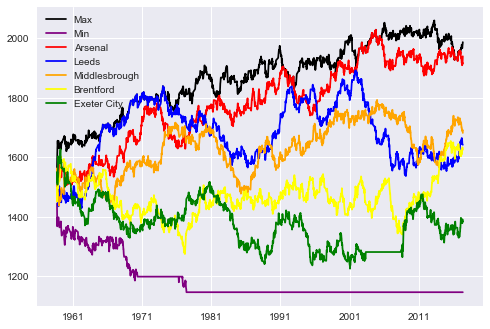

In [622]:
#Teams=Glickologlikplots(bestparams)
columns=['Time', 'Maximum Team', 'Minimum Team', 'Arsenal', 'Leeds United','Middlesbrough', 'Brentford', 'Exeter City']
TeamGlickodf=pd.DataFrame(Teams, columns=columns)
plt.plot(TeamGlickodf['Time'], TeamGlickodf['Maximum Team'], color='black')
plt.plot(TeamGlickodf['Time'], TeamGlickodf['Minimum Team'], color='purple')
plt.plot(TeamGlickodf['Time'], TeamGlickodf['Arsenal'], color='red')
plt.plot(TeamGlickodf['Time'], TeamGlickodf['Leeds United'], color='blue')

plt.plot(TeamGlickodf['Time'], TeamGlickodf['Middlesbrough'], color='orange')
plt.plot(TeamGlickodf['Time'], TeamGlickodf['Brentford'], color='yellow')
plt.plot(TeamGlickodf['Time'], TeamGlickodf['Exeter City'], color='green')
plt.legend(('Max', 'Min', 'Arsenal', 'Leeds', 'Middlesbrough','Brentford', 'Exeter City' ))
plt.savefig('GlickoTeamPlot.png')
plt.show()

In [619]:
Teams

[[Timestamp('1958-08-28 00:00:00'),
  1566.3567283807574,
  1445.3588084554071,
  1500.0,
  1472.6794042277036,
  1554.6411915445929,
  1500.0,
  1542.9256547084285],
 [Timestamp('1958-09-04 00:00:00'),
  1594.1859386531276,
  1402.8540267501867,
  1496.4716433458632,
  1472.6794042277036,
  1523.6755319494489,
  1451.6999117815158,
  1518.4054252449262],
 [Timestamp('1958-09-12 00:00:00'),
  1624.236168073096,
  1368.4721157052666,
  1537.0104334980499,
  1498.655253106971,
  1563.6294863200535,
  1495.7980974594468,
  1551.5723569260044],
 [Timestamp('1958-09-18 00:00:00'),
  1630.5460777953508,
  1379.2122741572668,
  1532.4790513264345,
  1476.0178948320997,
  1514.9147100516739,
  1498.8747994043301,
  1511.026585357381],
 [Timestamp('1958-09-25 00:00:00'),
  1639.5948426593138,
  1398.1776147489084,
  1543.0465406073833,
  1456.1861353605534,
  1499.3730417036804,
  1497.0534268197589,
  1508.3794424134967],
 [Timestamp('1958-10-02 00:00:00'),
  1656.115816152007,
  1388.85693393

In [550]:
homes=Glickologlikplots(bestparams)

100.178229116 1958-08-28 00:00:00 1958
93.7116817255 1958-09-04 00:00:00 1958
91.0031080462 1958-09-12 00:00:00 1958
86.0813522235 1958-09-18 00:00:00 1958
82.0150962158 1958-09-25 00:00:00 1958
80.2612538761 1958-10-02 00:00:00 1958
78.5789772854 1958-10-09 00:00:00 1958
77.1258905357 1958-10-17 00:00:00 1958
75.7187181055 1958-10-22 00:00:00 1958
74.5144195079 1958-10-31 00:00:00 1958
73.2253896301 1958-11-01 00:00:00 1958
72.1508277472 1958-11-08 00:00:00 1958
71.078785902 1958-11-15 00:00:00 1958
70.2993891626 1958-11-22 00:00:00 1958
69.2586053826 1958-12-05 00:00:00 1958
68.4369363324 1958-12-06 00:00:00 1958
67.5411171753 1958-12-18 00:00:00 1958
65.6331708573 1958-12-26 00:00:00 1958
64.9593276317 1959-01-01 00:00:00 1958
64.2139743648 1959-01-03 00:00:00 1958
64.5502825504 1959-01-10 00:00:00 1958
64.8848473425 1959-01-23 00:00:00 1958
65.217695569 1959-01-24 00:00:00 1958
64.4893672824 1959-02-04 00:00:00 1958
64.0789207823 1959-02-07 00:00:00 1958
64.4159341827 1959-02-18 00

51.4174565857 1962-11-09 00:00:00 1962
51.3585251641 1962-11-16 00:00:00 1962
51.2296459584 1962-11-17 00:00:00 1962
51.1756965193 1962-11-30 00:00:00 1962
51.0786867718 1962-12-07 00:00:00 1962
50.9855515148 1962-12-10 00:00:00 1962
51.0079247928 1962-12-21 00:00:00 1962
50.9821076425 1962-12-26 00:00:00 1962
51.405066007 1963-01-04 00:00:00 1962
51.8245793128 1963-01-04 00:00:00 1962
52.2407167441 1963-01-12 00:00:00 1962
52.6535651888 1963-01-19 00:00:00 1962
53.0632014115 1963-01-26 00:00:00 1962
53.4696992363 1963-02-02 00:00:00 1962
52.7007327771 1963-02-13 00:00:00 1962
52.5198081454 1963-02-20 00:00:00 1962
52.3881800734 1963-02-27 00:00:00 1962
52.2789450206 1963-03-08 00:00:00 1962
52.2216947349 1963-03-15 00:00:00 1962
52.6346923924 1963-03-22 00:00:00 1962
51.8887464734 1963-03-29 00:00:00 1962
51.7624608044 1963-04-05 00:00:00 1962
51.2314999556 1963-04-12 00:00:00 1962
50.186641165 1963-04-19 00:00:00 1962
50.1318179869 1963-04-26 00:00:00 1962
50.5618901038 1963-05-03 00

50.6879635952 1967-02-03 00:00:00 1966
50.5833999433 1967-02-08 00:00:00 1966
50.5468153929 1967-02-17 00:00:00 1966
50.9733860071 1967-02-24 00:00:00 1966
50.8808556142 1967-03-03 00:00:00 1966
50.7893704038 1967-03-10 00:00:00 1966
51.2139206451 1967-03-17 00:00:00 1966
50.6767783696 1967-03-24 00:00:00 1966
50.1311159535 1967-03-31 00:00:00 1966
50.0472635962 1967-04-07 00:00:00 1966
49.967477944 1967-04-14 00:00:00 1966
49.8979168422 1967-04-21 00:00:00 1966
49.8539366194 1967-04-28 00:00:00 1966
49.7869845431 1967-05-05 00:00:00 1966
49.2913157302 1967-05-12 00:00:00 1966
49.7286577805 1967-05-19 00:00:00 1966
50.1621867673 1967-05-26 00:00:00 1966
50.5920007108 1967-05-27 00:00:00 1966
51.0182001416 1967-05-27 00:00:00 1966
51.4408685333 1967-05-27 00:00:00 1966
51.8600922217 1967-05-27 00:00:00 1966
52.2759540804 1967-05-27 00:00:00 1966
52.6885337126 1967-05-27 00:00:00 1966
53.0979076288 1967-05-27 00:00:00 1966
53.5041494123 1967-05-27 00:00:00 1966
53.9073298737 1967-05-27 0

55.1911259912 1971-05-07 00:00:00 1970
55.5820708318 1971-05-07 00:00:00 1970
54.7339053279 1971-08-20 00:00:00 1971
53.8664330634 1971-08-27 00:00:00 1971
53.2170234315 1971-09-03 00:00:00 1971
53.0447717109 1971-09-10 00:00:00 1971
52.8596464904 1971-09-17 00:00:00 1971
52.6802732211 1971-09-24 00:00:00 1971
52.6869463044 1971-10-01 00:00:00 1971
52.6329283178 1971-10-08 00:00:00 1971
52.4792629154 1971-10-15 00:00:00 1971
52.3498499615 1971-10-22 00:00:00 1971
52.195000726 1971-10-29 00:00:00 1971
52.0382988399 1971-11-05 00:00:00 1971
52.1063208576 1971-11-12 00:00:00 1971
52.0091257625 1971-11-19 00:00:00 1971
51.9869096093 1971-11-26 00:00:00 1971
51.8646442315 1971-12-03 00:00:00 1971
51.7569188878 1971-12-04 00:00:00 1971
51.6131100584 1971-12-17 00:00:00 1971
51.5751780064 1971-12-18 00:00:00 1971
51.4431516068 1971-12-27 00:00:00 1971
51.405648082 1972-01-07 00:00:00 1971
51.2728224765 1972-01-08 00:00:00 1971
51.6934020974 1972-01-21 00:00:00 1971
51.551225413 1972-01-28 00:

51.8808344608 1975-12-05 00:00:00 1975
51.7947841114 1975-12-12 00:00:00 1975
51.6932055304 1975-12-19 00:00:00 1975
51.0288137504 1975-12-26 00:00:00 1975
51.101688832 1976-01-02 00:00:00 1975
51.5236654996 1976-01-09 00:00:00 1975
51.4715462162 1976-01-16 00:00:00 1975
51.3913105724 1976-01-23 00:00:00 1975
51.8109283023 1976-01-30 00:00:00 1975
51.6842083483 1976-02-06 00:00:00 1975
51.6469702412 1976-02-13 00:00:00 1975
51.5218045173 1976-02-20 00:00:00 1975
50.9828773492 1976-02-27 00:00:00 1975
50.9213326752 1976-03-05 00:00:00 1975
50.8299478234 1976-03-12 00:00:00 1975
50.8213967064 1976-03-19 00:00:00 1975
50.7892373595 1976-03-26 00:00:00 1975
50.692799445 1976-04-02 00:00:00 1975
50.2806224396 1976-04-09 00:00:00 1975
50.2629164595 1976-04-16 00:00:00 1975
49.8273275328 1976-04-23 00:00:00 1975
49.7633651681 1976-04-29 00:00:00 1975
50.1965943839 1976-05-04 00:00:00 1975
50.626122679 1976-05-04 00:00:00 1975
51.0520372491 1976-05-04 00:00:00 1975
51.4744277973 1976-05-04 00:

50.8675305929 1980-03-21 00:00:00 1979
50.7555106616 1980-03-28 00:00:00 1979
50.7363080065 1980-04-04 00:00:00 1979
50.1695003579 1980-04-11 00:00:00 1979
50.1116336479 1980-04-18 00:00:00 1979
49.537058639 1980-04-25 00:00:00 1979
49.6932358426 1980-05-02 00:00:00 1979
49.6339214224 1980-05-09 00:00:00 1979
50.0682707622 1980-05-16 00:00:00 1979
50.4988841121 1980-05-19 00:00:00 1979
50.9258628434 1980-05-19 00:00:00 1979
51.3492912913 1980-05-19 00:00:00 1979
51.7692565708 1980-05-19 00:00:00 1979
52.1858422914 1980-05-19 00:00:00 1979
52.5991287517 1980-05-19 00:00:00 1979
53.0091931198 1980-05-19 00:00:00 1979
53.4161096018 1980-05-19 00:00:00 1979
53.8199495983 1980-05-19 00:00:00 1979
54.220781851 1980-05-19 00:00:00 1979
54.6186725792 1980-05-19 00:00:00 1979
55.0136856072 1980-05-19 00:00:00 1979
55.4058824842 1980-05-19 00:00:00 1979
54.5931581578 1980-08-20 00:00:00 1980
54.4597568151 1980-08-29 00:00:00 1980
54.3549902604 1980-09-05 00:00:00 1980
54.1225657008 1980-09-06 00

50.7195176485 1984-04-20 00:00:00 1983
50.6963404144 1984-04-27 00:00:00 1983
50.6942737995 1984-05-04 00:00:00 1983
50.075476673 1984-05-11 00:00:00 1983
50.043006345 1984-05-17 00:00:00 1983
50.4738352494 1984-05-21 00:00:00 1983
50.9010241013 1984-05-21 00:00:00 1983
51.3246574692 1984-05-21 00:00:00 1983
51.7448226792 1984-05-21 00:00:00 1983
52.1616035402 1984-05-21 00:00:00 1983
52.5750805387 1984-05-21 00:00:00 1983
52.9853310212 1984-05-21 00:00:00 1983
53.3924293622 1984-05-21 00:00:00 1983
53.7964471222 1984-05-21 00:00:00 1983
54.1974531943 1984-05-21 00:00:00 1983
54.5955139414 1984-05-21 00:00:00 1983
54.9906933244 1984-05-21 00:00:00 1983
55.3830530223 1984-05-21 00:00:00 1983
55.7726525445 1984-05-21 00:00:00 1983
55.0058876843 1984-08-31 00:00:00 1984
54.1289035377 1984-09-07 00:00:00 1984
53.8959413215 1984-09-14 00:00:00 1984
53.7258158574 1984-09-21 00:00:00 1984
53.5352713839 1984-09-28 00:00:00 1984
53.372748967 1984-10-05 00:00:00 1984
53.2660547967 1984-10-12 00:

50.7594538852 1988-05-15 00:00:00 1987
51.1842589914 1988-05-15 00:00:00 1987
51.6055673186 1988-05-15 00:00:00 1987
52.0234638221 1988-05-15 00:00:00 1987
52.4380300719 1988-05-15 00:00:00 1987
52.8493444387 1988-05-15 00:00:00 1987
53.2574822666 1988-05-15 00:00:00 1987
53.6625160344 1988-05-15 00:00:00 1987
54.0645155062 1988-05-15 00:00:00 1987
54.463547871 1988-05-15 00:00:00 1987
54.8596778743 1988-05-15 00:00:00 1987
55.2529679406 1988-05-15 00:00:00 1987
55.6434782883 1988-05-15 00:00:00 1987
54.8519410413 1988-09-02 00:00:00 1988
54.5806721953 1988-09-09 00:00:00 1988
54.3487204005 1988-09-16 00:00:00 1988
53.6045773225 1988-09-23 00:00:00 1988
53.384748389 1988-09-30 00:00:00 1988
52.6680029757 1988-10-07 00:00:00 1988
52.6098093088 1988-10-14 00:00:00 1988
52.4803887779 1988-10-21 00:00:00 1988
51.8153368313 1988-10-28 00:00:00 1988
51.6667284046 1988-11-04 00:00:00 1988
51.5450211446 1988-11-11 00:00:00 1988
51.4075403067 1988-11-13 00:00:00 1988
51.3178259857 1988-11-25 00

53.665387555 1992-05-05 00:00:00 1991
52.8622409978 1992-08-21 00:00:00 1992
52.1665528399 1992-08-28 00:00:00 1992
52.0530610633 1992-09-04 00:00:00 1992
51.9003076426 1992-09-11 00:00:00 1992
51.7851244195 1992-09-18 00:00:00 1992
51.7775101595 1992-09-25 00:00:00 1992
51.6552476329 1992-10-02 00:00:00 1992
51.5971048714 1992-10-04 00:00:00 1992
51.4570501856 1992-10-16 00:00:00 1992
51.4938138674 1992-10-23 00:00:00 1992
51.3603331963 1992-10-30 00:00:00 1992
50.750809676 1992-11-04 00:00:00 1992
50.6976586155 1992-11-09 00:00:00 1992
50.5954588042 1992-11-20 00:00:00 1992
50.5661378286 1992-11-23 00:00:00 1992
50.5675470264 1992-12-04 00:00:00 1992
50.4734127442 1992-12-11 00:00:00 1992
50.3832764869 1992-12-18 00:00:00 1992
50.3131899647 1992-12-21 00:00:00 1992
50.2602757698 1992-12-29 00:00:00 1992
50.6892579355 1993-01-08 00:00:00 1992
50.5872603179 1993-01-15 00:00:00 1992
50.5301986693 1993-01-22 00:00:00 1992
50.4992734454 1993-01-29 00:00:00 1992
50.4030272427 1993-02-05 00

52.5881367381 1996-11-08 00:00:00 1996
52.9982787118 1996-11-15 00:00:00 1996
52.9765057037 1996-11-22 00:00:00 1996
52.7972044509 1996-11-29 00:00:00 1996
52.4031036861 1996-12-04 00:00:00 1996
52.2441779405 1996-12-13 00:00:00 1996
52.6569992464 1996-12-20 00:00:00 1996
52.1716643445 1996-12-26 00:00:00 1996
52.0090517159 1997-01-01 00:00:00 1996
52.423724733 1997-01-10 00:00:00 1996
52.3320604632 1997-01-17 00:00:00 1996
52.1787215495 1997-01-24 00:00:00 1996
52.029463183 1997-01-31 00:00:00 1996
52.1100716201 1997-02-07 00:00:00 1996
52.5239470427 1997-02-14 00:00:00 1996
52.9345864021 1997-02-21 00:00:00 1996
52.752754934 1997-02-28 00:00:00 1996
52.150123969 1997-03-07 00:00:00 1996
52.0268837508 1997-03-14 00:00:00 1996
51.3637934278 1997-03-21 00:00:00 1996
51.2567678174 1997-03-28 00:00:00 1996
51.6774781086 1997-04-04 00:00:00 1996
51.6108115199 1997-04-11 00:00:00 1996
51.650509035 1997-04-18 00:00:00 1996
51.0645975533 1997-04-25 00:00:00 1996
51.4868782345 1997-05-01 00:00

52.2671568067 2001-01-24 00:00:00 2000
52.1022445369 2001-02-02 00:00:00 2000
51.9425646076 2001-02-09 00:00:00 2000
51.7900160692 2001-02-16 00:00:00 2000
52.2064290235 2001-02-23 00:00:00 2000
52.0468130214 2001-03-02 00:00:00 2000
51.8900959978 2001-03-09 00:00:00 2000
52.3057121539 2001-03-16 00:00:00 2000
52.4253638806 2001-03-23 00:00:00 2000
52.8367694737 2001-03-30 00:00:00 2000
52.1069184274 2001-04-06 00:00:00 2000
52.0614457201 2001-04-13 00:00:00 2000
51.4836567197 2001-04-18 00:00:00 2000
51.3763408411 2001-04-26 00:00:00 2000
51.2856389775 2001-05-03 00:00:00 2000
51.1731233587 2001-05-08 00:00:00 2000
51.5945157496 2001-05-15 00:00:00 2000
51.6130341613 2001-05-19 00:00:00 2000
52.0308706934 2001-05-19 00:00:00 2000
52.445378394 2001-05-19 00:00:00 2000
52.8566355783 2001-05-19 00:00:00 2000
53.2647175383 2001-05-19 00:00:00 2000
53.6696967032 2001-05-19 00:00:00 2000
54.0716427897 2001-05-19 00:00:00 2000
54.4706229426 2001-05-19 00:00:00 2000
54.8667018649 2001-05-19 0

53.1523029354 2005-08-12 00:00:00 2005
52.9504801196 2005-08-15 00:00:00 2005
52.757782479 2005-08-26 00:00:00 2005
52.0577540412 2005-09-02 00:00:00 2005
52.4720421512 2005-09-09 00:00:00 2005
51.8707737317 2005-09-16 00:00:00 2005
51.7689475433 2005-09-23 00:00:00 2005
51.1941424111 2005-09-30 00:00:00 2005
51.0878228653 2005-10-07 00:00:00 2005
51.5099131324 2005-10-14 00:00:00 2005
50.876092505 2005-10-21 00:00:00 2005
50.8085684145 2005-10-28 00:00:00 2005
50.7212519731 2005-11-02 00:00:00 2005
50.6171016976 2005-11-11 00:00:00 2005
51.0430848914 2005-11-18 00:00:00 2005
50.4241921393 2005-11-22 00:00:00 2005
50.3317056262 2005-11-30 00:00:00 2005
49.794100233 2005-12-09 00:00:00 2005
50.2270643315 2005-12-16 00:00:00 2005
50.2175941676 2005-12-23 00:00:00 2005
49.7751659308 2005-12-29 00:00:00 2005
49.2568499036 2006-01-04 00:00:00 2005
49.6944952921 2006-01-13 00:00:00 2005
49.6295152717 2006-01-20 00:00:00 2005
49.090696427 2006-01-27 00:00:00 2005
49.071633999 2006-02-03 00:00

51.3375317897 2009-11-06 00:00:00 2009
51.2111940236 2009-11-09 00:00:00 2009
51.6322756848 2009-11-20 00:00:00 2009
51.5907577065 2009-11-25 00:00:00 2009
51.4722016117 2009-12-02 00:00:00 2009
50.8358119521 2009-12-11 00:00:00 2009
50.7930870959 2009-12-18 00:00:00 2009
51.2176065271 2009-12-20 00:00:00 2009
51.0949387658 2009-12-30 00:00:00 2009
51.516970727 2010-01-08 00:00:00 2009
51.4186314718 2010-01-11 00:00:00 2009
51.2994762367 2010-01-20 00:00:00 2009
51.171227827 2010-01-27 00:00:00 2009
51.0588864136 2010-02-05 00:00:00 2009
50.4689081163 2010-02-12 00:00:00 2009
49.9545126609 2010-02-19 00:00:00 2009
49.3917810789 2010-02-26 00:00:00 2009
49.3478745643 2010-03-02 00:00:00 2009
49.2975628258 2010-03-12 00:00:00 2009
48.7912763958 2010-03-19 00:00:00 2009
48.3801318399 2010-03-24 00:00:00 2009
47.5466843069 2010-04-02 00:00:00 2009
47.6021935641 2010-04-06 00:00:00 2009
47.6320010276 2010-04-16 00:00:00 2009
47.7014400438 2010-04-21 00:00:00 2009
47.7095326253 2010-04-27 00

51.452230247 2013-11-29 00:00:00 2013
50.8904677036 2013-12-04 00:00:00 2013
50.7823519135 2013-12-09 00:00:00 2013
50.6848102141 2013-12-20 00:00:00 2013
50.1000501668 2013-12-26 00:00:00 2013
49.5711679415 2014-01-03 00:00:00 2013
49.5389748045 2014-01-10 00:00:00 2013
49.9741494249 2014-01-14 00:00:00 2013
49.9035216245 2014-01-24 00:00:00 2013
49.411942997 2014-01-31 00:00:00 2013
49.3920586519 2014-02-04 00:00:00 2013
49.4062433452 2014-02-14 00:00:00 2013
49.3502344608 2014-02-21 00:00:00 2013
49.3617368858 2014-02-25 00:00:00 2013
49.4294195533 2014-03-07 00:00:00 2013
49.440296749 2014-03-12 00:00:00 2013
49.5119034619 2014-03-21 00:00:00 2013
49.1925488466 2014-03-26 00:00:00 2013
48.3180530722 2014-04-04 00:00:00 2013
48.3637129436 2014-04-11 00:00:00 2013
48.3467079901 2014-04-18 00:00:00 2013
47.9214652583 2014-04-25 00:00:00 2013
47.9725289075 2014-04-29 00:00:00 2013
48.148321318 2014-05-07 00:00:00 2013
48.595951455 2014-05-11 00:00:00 2013
49.0395015022 2014-05-11 00:00

In [281]:
SpursPlot

[[100.17822911577095, 7.0],
 [94.276552902069341, 14.0],
 [88.895472802064731, 21.0],
 [84.652259929079506, 28.0],
 [83.127611645441647, 35.0],
 [81.228670388407807, 42.0],
 [79.552974451069176, 49.0],
 [78.085368889114321, 56.0],
 [76.610571862559752, 63.0],
 [75.42340884956387, 70.0],
 [74.083360116568826, 77.0],
 [72.813344149445172, 84.0],
 [71.850235251086687, 91.0],
 [70.836213257275986, 98.0],
 [70.013547247166912, 105.0],
 [68.986777441643511, 112.0],
 [68.109661045949636, 119.0],
 [65.233477664963843, 126.0],
 [65.564555745821622, 133.0],
 [64.793239524426596, 140.0],
 [65.126556018552293, 147.0],
 [64.511000847885981, 154.0],
 [64.845768342960156, 161.0],
 [64.106486218781626, 168.0],
 [63.411125806387055, 175.0],
 [63.751670048503868, 182.0],
 [63.161168320961394, 189.0],
 [61.968531900171619, 196.0],
 [61.426771549868938, 203.0],
 [60.918792861014865, 210.0],
 [59.570755396641601, 217.0],
 [58.466754253080104, 224.0],
 [57.301136576257029, 231.0],
 [57.055188963324937, 238.

In [565]:
homes
columns=['time', 'HFA']
homedf=pd.DataFrame(homes, columns=columns)
plt.plot(homedf['time'], homedf['HFA'])
plt.xlabel('Year')
plt.ylabel('Home Field Advantage')
plt.title('Home Field Advantage Over Time In Glicko')
plt.savefig('GlickoHF.png')

In [520]:
columns=['Rating','Rd', 'Day', 'Year']
Leicesterdf=pd.DataFrame(Leicesterplot, columns=columns)
Leicestercut=Leicesterdf[Leicesterdf['Year']==2015].reset_index()

In [521]:
Leicestercut

index       Rating         Rd        Day  Year
0    2971  1736.745752  55.348329 2015-08-07  2015
1    2972  1743.916363  55.074317 2015-08-14  2015
2    2973  1753.572008  54.805333 2015-08-21  2015
3    2974  1755.198035  54.560203 2015-08-28  2015
4    2975  1754.798275  54.300741 2015-08-31  2015
5    2976  1754.798275  54.698042 2015-09-11  2015
6    2977  1760.805185  54.486049 2015-09-18  2015
7    2978  1762.094131  54.244864 2015-09-25  2015
8    2979  1756.858656  54.085399 2015-10-02  2015
9    2980  1765.470251  53.846061 2015-10-04  2015
10   2981  1765.470251  54.246692 2015-10-16  2015
11   2982  1767.410240  54.034831 2015-10-23  2015
12   2983  1774.532109  53.808344 2015-10-30  2015
13   2984  1783.138130  53.581915 2015-11-06  2015
14   2985  1788.960265  53.410109 2015-11-08  2015
15   2986  1788.960265  53.813986 2015-11-20  2015
16   2987  1796.192493  53.593162 2015-11-27  2015
17   2988  1798.443638  53.421768 2015-12-04  2015
18   2989  1806.544984  53.209026 2015-12-11  2015
19   2990  1815.778452  53.021968 2015-12-18  2015
20   2991  1824.945935  52.840238 2015-12-21  2015
21   2992  1820.867949  52.138918 2016-01-01  2015
22   2993  1817.677983  52.074748 2016-01-07  2015
23   2994  1827.931812  51.980498 2016-01-15  2015
24   2995  1825.233355  51.895884 2016-01-19  2015
25   2996  1831.579695  51.759203 2016-01-26  2015
26   2997  1838.958910  51.613428 2016-02-05  2015
27   2998  1849.789674  51.579139 2016-02-12  2015
28   2999  1845.044396  51.515740 2016-02-16  2015
29   3000  1845.044396  51.934353 2016-02-26  2015
30   3001  1846.124089  51.434047 2016-03-04  2015
31   3002  1852.247886  51.317740 2016-03-08  2015
32   3003  1855.849509  51.334796 2016-03-18  2015
33   3004  1861.546654  51.235106 2016-03-25  2015
34   3005  1861.546654  51.655993 2016-04-01  2015
35   3006  1867.345673  51.542832 2016-04-05  2015
36   3007  1872.371822  51.465469 2016-04-15  2015
37   3008  1870.208208  51.376071 2016-04-22  2015
38   3009  1874.778588  51.326775 2016-04-29  2015
39   3010  1876.194331  51.217480 2016-05-02  2015
40   3011  1881.257253  51.146736 2016-05-11  2015
41   3012  1882.248771  51.034357 2016-05-16  2015
42   3013  1882.248771  51.456893 2016-05-16  2015
43   3014  1882.248771  51.875987 2016-05-16  2015
44   3015  1882.248771  52.291723 2016-05-16  2015
45   3016  1882.248771  52.704179 2016-05-16  2015
46   3017  1882.248771  53.113432 2016-05-16  2015
47   3018  1882.248771  53.519556 2016-05-16  2015
48   3019  1882.248771  53.922622 2016-05-16  2015
49   3020  1882.248771  54.322696 2016-05-16  2015
50   3021  1882.248771  54.719846 2016-05-16  2015
51   3022  1882.248771  55.114134 2016-05-16  2015

In [527]:
plt.plot(Leicestercut['Day'], Leicestercut['Rating'], color='brown')
plt.xlabel('Day')
plt.ylabel('Rating Deviation')
plt.title('Rating for Leicester City in 2015')
plt.savefig('2015LeicesterRating.png')
#plt.show()

In [311]:
def stripyear(dt):
    return dt.year

In [312]:
Spursddf['Year']=stripyear(Spursdf['Day'][0])

1958

In [601]:
import copy
#Initializing all teams to be the same, plotting how long it takes to get teams to around the correct point
initdictionary2={}
initvalues=[1500,1500,1500,1500]
initialrows=[]
#This needs to be rewritten so we don't have to run it over an dover again
for i in range(len(fulldf['home'].unique())):
    Team=fulldf['home'].unique()[i]
    Teamdf=fulldf[fulldf['home']==Team].reset_index()
    Tier=int(Teamdf['tier'][0])
    initialrow=[Team, Tier]
    initialrows.append(initialrow)
#Needs to be rewritten to optimize using BuildEloDict Function
for a in range(len(initialrows)):
    initdictionary2[initialrows[a][0]]=initvalues[initialrows[a][1]-1]
def loglikplots(params):
    Hk=params['hk']
    k=params['c']
    initHF=80
    avgE=0
    HFA=initHF
    logliks=0.0
    burn_in=25
    hburn=10
    Elodictionary=copy.deepcopy(initdictionary2)
    startyear=fulldf['Season'].values[0]
    HFAyear=fulldf['Season'].values[0]
    HFcounter=0.
    Gamecounter=0.
    Rs=0
    games=0
    yearlogliks=0
    yeargames=0
    divliks=[]
    firstliks=0
    secondliks=0
    thirdliks=0
    fourthliks=0
    firstgames=0
    secondgames=0
    thirdgames=0
    fourthgames=0
    Rplots=[]
    Teamyears=[]
    currentyear=copy.deepcopy(startyear)
    Gamepreds=[]
    for ind, row in fulldf.iterrows():
        Home=row['home']
        Away=row['visitor']
        HomeGoals=row['hgoal']
        AwayGoals=row['vgoal']
        year=row['Season']
        if(year>currentyear):
            maxvals=0
            minvals=10000
            for key in Elodictionary:
                print(Elodictionary[key])
                #print(Elodictionary[key][0])
                maxvals=max(maxvals, Elodictionary[key])
                minvals=min(minvals, Elodictionary[key])
                
            Teamyears.append([currentyear, maxvals, minvals, Elodictionary['Arsenal'],Elodictionary['Leeds United'], Elodictionary['Middlesbrough'],Elodictionary['Brentford'],
                             Elodictionary['Exeter City']])
            if(year>startyear+hburn):
                HFA+=(HFcounter/Gamecounter)*Hk
                Rplots.append([currentyear, Gamecounter, Rs])
                Gamecounter=0.  
                Rs=0.
                HFcounter=0.
            #print(year, currentyear, yearlogliks, yeargames, HFA, firstliks, firstgames, 
         #        secondliks, secondgames,
          #       thirdliks, thirdgames,
           #      fourthliks, fourthgames)
            divliks.append([year, currentyear, yearlogliks, yeargames, HFA, firstliks, firstgames, 
                 secondliks, secondgames,
                 thirdliks, thirdgames,
                 fourthliks, fourthgames])
            yearlogliks=0
            yeargames=0
            firstliks=0
            secondliks=0
            thirdliks=0
            fourthliks=0
            firstgames=0
            secondgames=0
            thirdgames=0
            fourthgames=0
        #CalendarYear=row['CalendarYear']
        #Month=row['Month']
        Division=row['tier']
        HomeELO=Elodictionary[Home]
        AwayELO=Elodictionary[Away]
        Elodif=float((HomeELO-AwayELO+HFA)/400.0)
        avgE+=Elodif
        E=1/(10**(-1*(Elodif))+1)
        #Write Lambda Functions for this to calculate Rvalue and Loglik, gets rid of if statements
        Resfun = lambda x,y: (x > y)*1 + (x == y)*(.5)+(x<y)*0
        R=Resfun(HomeGoals, AwayGoals)
        mloglikfun = lambda x,y: np.log(np.sqrt(y*(1-y))) if x==.5 else np.log((-1*x)+1+(2*x-1)*y)
        MatchLogLik= mloglikfun(R, E)
        games+=1

        PointExchange=(R-E)*k

        Elodictionary[Home]=HomeELO+PointExchange
        Elodictionary[Away]=AwayELO-PointExchange
        
        
  #      logcount+=-1*np.log10((1-E)/E)
        if year>(startyear+hburn-1):
            Gamecounter+=1.
            HFcounter+=(R-E)
            Rs+=R
        if year>(startyear+burn_in):
            #print(HFcounter)
            logliks+=MatchLogLik
            yearlogliks+=MatchLogLik
            yeargames+=1.
            #print([Home, Away,HomeELO, AwayELO,
             #      HomeGoals, AwayGoals, R, E])
            Gamepreds.append([Home, Away,HomeELO, AwayELO, HomeGoals, AwayGoals, R, E])
            if(Division==1):
                firstliks+=MatchLogLik
                firstgames+=1.
            if(Division==2):
                secondliks+=MatchLogLik
                secondgames+=1.
            if(Division==3):
                thirdliks+=MatchLogLik
                thirdgames+=1.
            if(Division==4):
                fourthliks+=MatchLogLik
                fourthgames+=1.



        currentyear=copy.deepcopy(row['Season'])

    print([k, initHF, games,  Hk, HFA,Elodictionary['Tottenham Hotspur'], np.sum(logliks)])
    #print(Elodictionary)
    #print(initdictionary)
    return Teamyears

In [602]:
Eloparams={'c': 13.917977954857017, 'hk': 313.5728156982633}
TeamELOYear=loglikplots(Eloparams)

1494.2112707690817
1414.3527474557336
1514.938037723206
1493.7485228675937
1503.9305439587508
1403.8192715942187
1535.6066001159434
1503.399534952344
1583.5073962026966
1520.4161739641438
1537.2919857336717
1495.236349266864
1473.3188597572564
1452.6017584466072
1477.0572800224566
1438.7644441691268
1549.5548355386672
1495.7453878945078
1511.4040795697947
1564.840101199412
1457.7062631080994
1474.665215616102
1486.3967441027728
1572.6107079581288
1502.026161998596
1565.6945788402843
1470.2305231370651
1569.2817410486853
1496.2542270548986
1525.0952834309803
1455.7555346338208
1476.4043935981922
1497.265968624979
1484.3193115674985
1454.156751669117
1587.1778183705712
1512.2183801495494
1592.1251186050324
1485.1934901515256
1542.7293649586256
1442.9801589057113
1475.6884583687545
1602.5181104983496
1557.8317160500324
1386.0347253712234
1531.8266082048913
1558.7362407953979
1501.160248749105
1479.9101256635001
1507.1508614337108
1477.3346300650064
1520.984115561486
1528.1264441116714
141

1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1506.0289549032364
1428.5935414376036
1506.4561593409765
1476.1501867410075
1487.3691154956025
1375.0576904978645
1594.5467309791002
1514.6713399170746
1519.2221056703129
1482.7985178237982
1477.7315002757935
1515.0139172202737
1530.195875067862
1404.3577335148316
1451.6393659020189
1405.3112656731344
1643.1551004537503
1521.3414394521612
1534.428326249126
1476.6357566195309
1465.7528062441552
1554.1629678285851
1561.447582217679
1524.9247542033513
1576.8464546878627
1577.2345895574167
1479.2581995624748
1587.6793189860512
1401.916944000553
1493.2728399638972
1564.0389727853817
1321.3456429419468
1532.8443390492487
1405.8266105947382
1506.1494788704297
1530.7510623108296
1513.6369520800827
1610.0906089934385
1562.1713743852913
1488.8743428566904
1495.1083297999774
1628.856428849215
1552.5449496151716
1504.4109891250484
1508.6916889367546
1578.9723683716381
1563.3421877132685
1518.309314193904
1417.3969

1398.4434727792043
1530.9479798304837
1506.9196557947664
1544.5017646579627
1642.541662699001
1417.396958735115
1523.8248798776324
1403.2620120536728
1573.432378713586
1561.6403668251066
1345.0164634134069
1344.7168425076968
1343.2339888663391
1519.655728874935
1695.4318133202078
1605.4314772076648
1458.9602429485215
1622.7348140494007
1596.7991580628693
1468.526688984089
1446.4114365232238
1664.4364810748366
1623.162555682638
1344.2451148106031
1445.9378624383091
1452.2667036745133
1558.0810529466962
1678.0678908718164
1546.4787947359277
1647.5280351745268
1466.9609217731263
1440.659192055559
1403.9800170741828
1465.1643048791175
1506.7893291249254
1496.7114832324328
1524.8975223837529
1436.259129394688
1473.2621178219347
1495.3425742104282
1558.4901156629785
1473.8953341574797
1392.4298238621993
1477.87699496766
1388.9258513304972
1553.6032834144132
1562.0672912365135
1432.3919269779385
1555.0187981117847
1511.6057819981825
1556.015341523066
1500
1500
1500
1500
1500
1500
1500
1500
15

1577.0074206318563
1508.6628558055024
1643.555802476106
1388.7056592465515
1534.515308242738
1463.4574076403899
1508.8704612228732
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1438.6749863872599
1554.208203555314
1555.786487857564
1207.6686752628946
1485.4349000564182
1314.0225689047559
1661.7802504424535
1457.0096855105855
1531.1610958687731
1462.22074412001
1543.1550852991654
1477.4985502320367
1389.8856179810487
1324.8921747839238
1534.8718766718216
1385.3981723426332
1784.1253469079122
1666.8863972498054
1423.6479755419707
1552.945907744647
1353.3377459242115
1463.3327085781352
1517.854452385986
1535.6844098814183
1478.1585599945142
1594.280560154174
1558.190458079776
1597.6108334707583
1506.8367195023845
1425.1842185574087
1633.494877350735
1363.759351525738
1622.1535831744088
1399.4046244392014
1562.0740021181134
1454.1191569074522
1480.604767923736
1499.6830091885922
1443.7155684649083
1382.137353938219
1556.5054877820214
16

1500
1500
1500
1500
1489.9943920925657
1523.8849818383992
1511.2721267376933
1207.6686752628946
1539.2777031312228
1314.0225689047559
1472.1318300124274
1423.9382722218936
1477.858237967177
1335.7122798977477
1581.213259618306
1464.9483667642212
1429.5820148936025
1310.1848680145683
1538.0764297811902
1404.293743561769
1862.1943410742444
1682.357429476931
1490.8125247061023
1645.0335570057266
1351.0620528110458
1530.6326205601029
1605.2483312750378
1452.8872218759352
1338.7495469633554
1666.560798339001
1565.3640189437065
1767.7461278023507
1523.222806036825
1512.4543536344156
1612.422373353302
1301.7221780198631
1548.5665344111912
1474.035671650778
1549.9691708026203
1321.1001134448436
1480.9732892761374
1539.7305112749345
1558.713863997334
1499.6654625603362
1717.593754662565
1661.929012284931
1682.0578616107543
1438.197005137859
1435.5244908010409
1642.227718516452
1478.1929828698724
1593.192115163818
1417.396958735115
1561.6816120192725
1288.9917391943488
1467.4019563437214
1600.34

1365.4213607049508
1529.5916543078308
1522.2542451320683
1207.6686752628946
1481.3735612623223
1314.0225689047559
1421.2761015778408
1507.9961575142972
1592.8110924963687
1361.6979865436704
1439.8719653874919
1540.2833935763795
1311.6698165751477
1257.2313239751813
1415.7981623630792
1446.4994776439362
1840.7422434738014
1502.7831698344773
1488.5446534982696
1651.425087420516
1391.8595154819604
1705.728591937201
1505.372681205813
1573.9317329986154
1478.763100918954
1646.8528349734547
1674.9709505836931
1801.3553951084662
1429.2356069768935
1386.8786360832169
1657.0732941452388
1244.7518957175612
1663.0316184272808
1268.0802207315414
1542.3844441096269
1357.6657288590666
1538.9994279006487
1717.8614452617064
1410.242855306274
1321.4806700087258
1708.8257348051222
1771.9643737063052
1488.2534674832268
1469.839595844701
1606.0480828952195
1516.896014370912
1512.5653068456163
1688.9301804439365
1417.396958735115
1623.6873858826614
1383.587636479415
1411.9066018892845
1677.0931237648404
12

1411.5796333385451
1353.1729246216744
1417.6881575171253
1342.2399149989376
1910.275805923026
1564.8048550687479
1466.1086467041393
1745.6861096175464
1386.9154634575991
1602.927288009113
1543.742083488191
1560.622547971588
1517.6787693772396
1714.015126866055
1693.6365034677676
1740.8760571067223
1387.1951467667966
1269.7709717129778
1578.891862508787
1306.696806673977
1670.4746684889353
1429.3354420980995
1616.2474746227128
1559.2192252729085
1347.5728614750583
1686.2679922665027
1429.1537154989383
1392.6975701432057
1749.7555152489533
1779.4997820498522
1585.394321915669
1453.5722434110226
1591.6034286346621
1692.1391891080957
1634.0215448994047
1732.1415270817154
1417.396958735115
1651.316402356466
1290.0946726423933
1392.538656703573
1654.6383502468948
1318.1279879437275
1351.5555478457204
1162.9409711378826
1471.1180361337083
1668.7844487409345
1807.7955250473412
1431.223574368174
1556.3991704759965
1775.191212408456
1588.6611153613496
1404.2509211091476
1784.9634628646243
1620.9

1483.1857370128728
1263.969162487918
1425.3877319043502
1463.2348174054662
1334.5141320946952
1244.4824254518503
1600.6207529839837
1537.6583266190555
1420.066600164424
1495.7747685146662
1212.0518692786259
1233.8323552873928
1214.1918740107792
1709.1671599682338
1597.4834378915311
1438.21960121534
1570.9386554293305
1466.630548416538
1515.491804747984
1441.5071607434597
1283.7797028557309
1744.8956056096843
1315.998333942128
1248.2618517166923
1306.8497318495056
1324.627117827705
1498.2448431226474
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1596.0235228853714
1538.2685321789852
1418.2015299797808
1207.6686752628946
1285.875175695875
1314.0225689047559
1449.7810918104144
1611.797181600043
1335.087679475443
1599.9350307177617
1598.1958487545062
1557.6175507109622
1323.495200342559
1509.3204281380856
1266.005571448331
1303.7227996411182
1831.0040672141058
1659.6272251232228
1588.088749703402
1603.5520506649857
1337.9533853886758
1560.8530338277103
1491.35190232

1338.440034025485
1400.4870283885762
1374.830893790552
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1451.369716181034
1440.5059774465253
1301.8075263704657
1207.6686752628946
1523.8547112871445
1314.0225689047559
1620.020031739119
1726.3395219954566
1711.878911310612
1476.9280614686963
1696.8098996256062
1564.7830271044613
1375.213575114211
1460.7931318010187
1332.8975655779434
1287.2532252713308
1898.808491089557
1725.8113776273308
1570.488119824775
1610.300488813218
1381.5609071568283
1570.5815343535317
1496.977688705605
1344.9724203719109
1421.506986448755
1611.3220915153622
1475.152477496526
1935.577399874722
1422.506592086181
1427.7809733650188
1667.776850417432
1409.9094417168474
1813.6957596536045
1266.417234527592
1488.3478619383545
1454.8626957544639
1586.2510469618985
1559.047544798253
1635.7826050308327
1300.903431489566
1766.6394187421263
1738.3378731525484
1656.7359059510843
1514.827650024922
1530.8234385638532
1567.12574787304
1590.3354369143942
1522.91590092468

1758.6393388108502
1818.8791209914903
1658.6073612228174
1398.8189822380511
1741.928465397215
1634.026799326518
1679.9977452909816
1550.0933039771162
1417.396958735115
1779.7036198391193
1372.7151868678113
1532.457878055458
1719.3481738814917
1379.4950405065053
1276.3754084719599
1162.9409711378826
1305.9666105137535
1572.2685493014872
1904.8989260423045
1367.0512803099584
1654.2742233708516
1548.7291474347285
1512.6786350092498
1489.6331667228837
1794.4730949940301
1602.206241811969
1344.2451148106031
1326.7279107986826
1417.1836971068903
1696.0734735434285
1708.1925924809807
1631.0252111757245
1990.390753879515
1399.3714932772639
1474.745236043693
1495.8447882345745
1455.2319766625415
1463.4406544347207
1442.1573713724956
1272.1626684577661
1244.4824254518503
1650.1597446113544
1390.6747442201806
1380.381949742246
1476.176148843389
1236.2379478143832
1233.8323552873928
1214.1918740107792
1649.376131751502
1518.466551717021
1603.296948317442
1701.8439124783188
1359.5028998347157
1300.

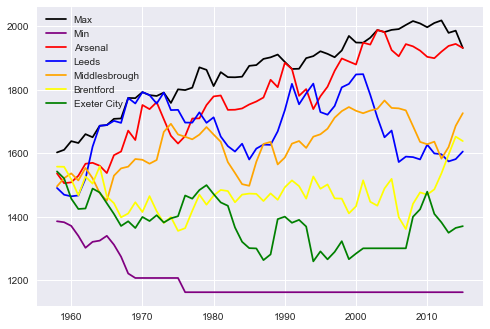

In [608]:
columns=['Year', 'Maximum Team', 'Minimum Team', 'Arsenal', 'Leeds United','Middlesbrough', 'Brentford', 'Exeter City']
TeamELOdf=pd.DataFrame(TeamELOYear, columns=columns)
plt.plot(TeamELOdf['Year'], TeamELOdf['Maximum Team'], color='black')
plt.plot(TeamELOdf['Year'], TeamELOdf['Minimum Team'], color='purple')
plt.plot(TeamELOdf['Year'], TeamELOdf['Arsenal'], color='red')
plt.plot(TeamELOdf['Year'], TeamELOdf['Leeds United'], color='blue')

plt.plot(TeamELOdf['Year'], TeamELOdf['Middlesbrough'], color='orange')
plt.plot(TeamELOdf['Year'], TeamELOdf['Brentford'], color='yellow')
plt.plot(TeamELOdf['Year'], TeamELOdf['Exeter City'], color='green')
plt.legend(('Max', 'Min', 'Arsenal', 'Leeds', 'Middlesbrough','Brentford', 'Exeter City' ))
plt.savefig('ELOTeamPlots.png')
plt.show()

In [588]:
for key in initdictionary:
    print(initdictionary[key][0])
initdictionary

1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500


{'AFC Bournemouth': [1500, 350, 3, 0, 0],
 'AFC Wimbledon': [1500, 350, 4, 0, 0],
 'Accrington': [1500, 350, 4, 0, 0],
 'Accrington Stanley': [1500, 350, 3, 0, 0],
 'Aldershot': [1500, 350, 4, 0, 0],
 'Arsenal': [1500, 350, 1, 0, 0],
 'Aston Villa': [1500, 350, 1, 0, 0],
 'Barnet': [1500, 350, 4, 0, 0],
 'Barnsley': [1500, 350, 2, 0, 0],
 'Barrow': [1500, 350, 4, 0, 0],
 'Birmingham City': [1500, 350, 1, 0, 0],
 'Blackburn Rovers': [1500, 350, 1, 0, 0],
 'Blackpool': [1500, 350, 1, 0, 0],
 'Bolton Wanderers': [1500, 350, 1, 0, 0],
 'Boston United': [1500, 350, 4, 0, 0],
 'Bradford City': [1500, 350, 3, 0, 0],
 'Bradford Park Avenue': [1500, 350, 4, 0, 0],
 'Brentford': [1500, 350, 3, 0, 0],
 'Brighton & Hove Albion': [1500, 350, 2, 0, 0],
 'Bristol City': [1500, 350, 2, 0, 0],
 'Bristol Rovers': [1500, 350, 2, 0, 0],
 'Burnley': [1500, 350, 1, 0, 0],
 'Burton Albion': [1500, 350, 4, 0, 0],
 'Bury': [1500, 350, 3, 0, 0],
 'Cambridge United': [1500, 350, 4, 0, 0],
 'Cardiff City': [1500,

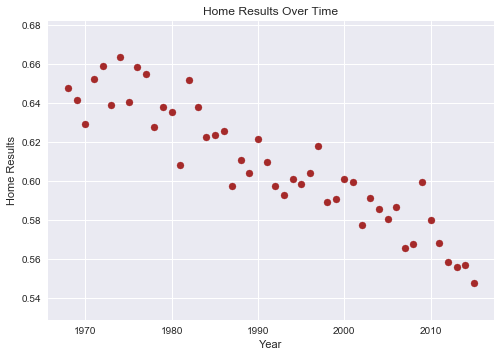

In [548]:
columns=['Year', 'Games', 'HomeR']
HomeRs=pd.DataFrame(EloHF, columns=columns)
HomeRs['Avg']=HomeRs['HomeR']/HomeRs['Games']
HomeRs
plt.scatter(HomeRs['Year'],HomeRs['Avg'], color='brown')
plt.xlabel('Year')
plt.ylabel('Home Results')
plt.title('Home Results Over Time')
plt.savefig('HomeResTime.png')
plt.show()

In [332]:
columns=['Year', 'CurYear', 'YearLiks', 'YearGames','HF', '1stLiks', '1stGames',
        '2ndLiks', '2ndGames',
        '3rdLiks', '3rdGames',
        '4thLiks', '4thGames']
Divdf=pd.DataFrame(divbreaks, columns=columns)[26:].reset_index()

In [364]:
Divdf['1stAvg']=-1*Divdf['1stLiks']/Divdf['1stGames']
Divdf['2ndAvg']=-1*Divdf['2ndLiks']/Divdf['2ndGames']
Divdf['3rdAvg']=-1*Divdf['3rdLiks']/Divdf['3rdGames']
Divdf['4thAvg']=-1*Divdf['4thLiks']/Divdf['4thGames']
plt.scatter(Divdf['Year'],Divdf['1stAvg'])
plt.scatter(Divdf['Year'],Divdf['2ndAvg'])
plt.scatter(Divdf['Year'],Divdf['3rdAvg'])
plt.scatter(Divdf['Year'],Divdf['4thAvg'])
#plt.legend
plt.title('Average LogLikeLihood Per Match Over Time')
plt.xlabel('Year')
plt.ylabel('Average LogLikelihood')
plt.legend(('1st Division', '2nd Division', '3rd Division', '4th Division'))
plt.savefig('ELOLogLikTime')



In [342]:
Divdf['1stAvg']

0    -0.630472
1    -0.620328
2    -0.634220
3    -0.642549
4    -0.680785
5    -0.650990
6    -0.628461
7    -0.661642
8    -0.685665
9    -0.658460
10   -0.640607
11   -0.630388
12   -0.669362
13   -0.649901
14   -0.639432
15   -0.608707
16   -0.628614
17   -0.633831
18   -0.627085
19   -0.637800
20   -0.616399
21   -0.605430
22   -0.615716
23   -0.581063
24   -0.599195
25   -0.594929
26   -0.642658
27   -0.627031
28   -0.608423
29   -0.606379
30   -0.627192
31   -0.658167
Name: 1stAvg, dtype: float64

In [384]:
Glickopreds=Glickologlikplots(bestparams)

100.178229116 1958-08-28 00:00:00 1958
94.2765529021 1958-09-04 00:00:00 1958
88.8954728021 1958-09-12 00:00:00 1958
84.6522599291 1958-09-18 00:00:00 1958
83.1276116454 1958-09-25 00:00:00 1958
81.2286703884 1958-10-02 00:00:00 1958
79.5529744511 1958-10-09 00:00:00 1958
78.0853688891 1958-10-17 00:00:00 1958
76.6105718626 1958-10-22 00:00:00 1958
75.4234088496 1958-10-31 00:00:00 1958
74.0833601166 1958-11-01 00:00:00 1958
72.8133441494 1958-11-08 00:00:00 1958
71.8502352511 1958-11-15 00:00:00 1958
70.8362132573 1958-11-22 00:00:00 1958
70.0135472472 1958-12-05 00:00:00 1958
68.9867774416 1958-12-06 00:00:00 1958
68.1096610459 1958-12-18 00:00:00 1958
65.233477665 1958-12-26 00:00:00 1958
65.5645557458 1959-01-01 00:00:00 1958
64.7932395244 1959-01-03 00:00:00 1958
65.1265560186 1959-01-10 00:00:00 1958
64.5110008479 1959-01-23 00:00:00 1958
64.845768343 1959-01-24 00:00:00 1958
64.1064862188 1959-02-04 00:00:00 1958
63.4111258064 1959-02-07 00:00:00 1958
63.7516700485 1959-02-18 00

52.3694217366 1962-11-02 00:00:00 1962
52.3176046535 1962-11-09 00:00:00 1962
52.1990979137 1962-11-16 00:00:00 1962
52.1347191285 1962-11-17 00:00:00 1962
51.9832051942 1962-11-30 00:00:00 1962
51.8676960384 1962-12-07 00:00:00 1962
51.7291137183 1962-12-10 00:00:00 1962
51.600315889 1962-12-21 00:00:00 1962
51.1873463358 1962-12-26 00:00:00 1962
51.6086225865 1963-01-04 00:00:00 1962
52.0264945489 1963-01-04 00:00:00 1962
52.4410296289 1963-01-12 00:00:00 1962
52.462386491 1963-01-19 00:00:00 1962
52.8735039936 1963-01-26 00:00:00 1962
53.2814491957 1963-02-02 00:00:00 1962
53.6862944098 1963-02-13 00:00:00 1962
54.0881092418 1963-02-20 00:00:00 1962
53.8521197724 1963-02-27 00:00:00 1962
53.7851195094 1963-03-08 00:00:00 1962
53.5734455491 1963-03-15 00:00:00 1962
53.3676881322 1963-03-22 00:00:00 1962
52.8436804608 1963-03-29 00:00:00 1962
52.744817207 1963-04-05 00:00:00 1962
51.9876352074 1963-04-12 00:00:00 1962
51.5035995316 1963-04-19 00:00:00 1962
51.3806897688 1963-04-26 00:

51.4462902348 1966-12-09 00:00:00 1966
51.3217424792 1966-12-16 00:00:00 1966
51.2691316261 1966-12-23 00:00:00 1966
50.6774178205 1966-12-30 00:00:00 1966
50.6689786479 1967-01-06 00:00:00 1966
50.5686005494 1967-01-13 00:00:00 1966
50.5704016707 1967-01-20 00:00:00 1966
50.4839913313 1967-01-27 00:00:00 1966
50.9110883669 1967-02-03 00:00:00 1966
50.830545443 1967-02-08 00:00:00 1966
50.7942395828 1967-02-17 00:00:00 1966
51.2187494612 1967-02-24 00:00:00 1966
51.1511674114 1967-03-03 00:00:00 1966
51.0290833609 1967-03-10 00:00:00 1966
51.4516555382 1967-03-17 00:00:00 1966
50.8256122786 1967-03-24 00:00:00 1966
50.2567172763 1967-03-31 00:00:00 1966
50.169284644 1967-04-07 00:00:00 1966
50.599038291 1967-04-14 00:00:00 1966
50.5828999726 1967-04-21 00:00:00 1966
50.4826380517 1967-04-28 00:00:00 1966
50.500198571 1967-05-05 00:00:00 1966
49.9414610668 1967-05-12 00:00:00 1966
49.9558413571 1967-05-19 00:00:00 1966
50.3874156003 1967-05-26 00:00:00 1966
50.8153244 1967-05-27 00:00:0

52.0116468722 1970-12-28 00:00:00 1970
52.4262993611 1971-01-08 00:00:00 1970
52.4409807755 1971-01-15 00:00:00 1970
52.3793225523 1971-01-22 00:00:00 1970
52.7910869762 1971-01-29 00:00:00 1970
52.6126440531 1971-02-05 00:00:00 1970
52.4411827124 1971-02-12 00:00:00 1970
52.3934733309 1971-02-19 00:00:00 1970
52.2313761336 1971-02-26 00:00:00 1970
52.6442978347 1971-03-05 00:00:00 1970
52.615471055 1971-03-12 00:00:00 1970
52.4353052938 1971-03-19 00:00:00 1970
51.6986009647 1971-03-26 00:00:00 1970
52.1157443944 1971-04-02 00:00:00 1970
51.4807155015 1971-04-09 00:00:00 1970
50.97843281 1971-04-16 00:00:00 1970
50.9218025158 1971-04-23 00:00:00 1970
50.5554589344 1971-04-30 00:00:00 1970
49.4574926214 1971-05-07 00:00:00 1970
49.8933841924 1971-05-07 00:00:00 1970
50.325500454 1971-05-07 00:00:00 1970
50.7539378346 1971-05-07 00:00:00 1970
51.1787887263 1971-05-07 00:00:00 1970
51.6001417175 1971-05-07 00:00:00 1970
52.0180818086 1971-05-07 00:00:00 1970
52.432690612 1971-05-07 00:00

51.1505091986 1975-02-14 00:00:00 1974
50.5810970571 1975-02-19 00:00:00 1974
50.566907035 1975-02-28 00:00:00 1974
50.6144815716 1975-03-07 00:00:00 1974
51.0404866343 1975-03-14 00:00:00 1974
51.0359180567 1975-03-21 00:00:00 1974
50.4125642151 1975-03-28 00:00:00 1974
50.4317957733 1975-04-04 00:00:00 1974
50.4390406751 1975-04-11 00:00:00 1974
50.4443226086 1975-04-18 00:00:00 1974
50.4135554247 1975-04-25 00:00:00 1974
49.8883769935 1975-05-02 00:00:00 1974
50.3205298823 1975-05-07 00:00:00 1974
50.7490092259 1975-05-07 00:00:00 1974
51.1739010354 1975-05-07 00:00:00 1974
51.5952939419 1975-05-07 00:00:00 1974
52.0132729861 1975-05-07 00:00:00 1974
52.4279198186 1975-05-07 00:00:00 1974
52.8393128861 1975-05-07 00:00:00 1974
53.2475276051 1975-05-07 00:00:00 1974
53.6526365226 1975-05-07 00:00:00 1974
54.0547094674 1975-05-07 00:00:00 1974
54.4538136899 1975-05-07 00:00:00 1974
54.8500139941 1975-05-07 00:00:00 1974
55.2433728598 1975-05-07 00:00:00 1974
55.6339505581 1975-05-07 0

50.4671998447 1979-05-04 00:00:00 1978
49.9064052272 1979-05-11 00:00:00 1978
49.8368050541 1979-05-18 00:00:00 1978
50.2694013212 1979-05-22 00:00:00 1978
50.6983127823 1979-05-22 00:00:00 1978
51.123625935 1979-05-22 00:00:00 1978
51.5454298509 1979-05-22 00:00:00 1978
51.9638099863 1979-05-22 00:00:00 1978
52.3788483843 1979-05-22 00:00:00 1978
52.790623863 1979-05-22 00:00:00 1978
53.1992121898 1979-05-22 00:00:00 1978
53.6046862447 1979-05-22 00:00:00 1978
54.0071161715 1979-05-22 00:00:00 1978
54.40656952 1979-05-22 00:00:00 1978
54.803111378 1979-05-22 00:00:00 1978
55.1968044952 1979-05-22 00:00:00 1978
54.3359434679 1979-08-24 00:00:00 1979
54.1363909137 1979-08-31 00:00:00 1979
53.9083416039 1979-09-07 00:00:00 1979
53.7249959308 1979-09-14 00:00:00 1979
53.5753025338 1979-09-21 00:00:00 1979
53.3562042814 1979-09-28 00:00:00 1979
53.2361975136 1979-10-05 00:00:00 1979
52.5412966901 1979-10-12 00:00:00 1979
52.4581146446 1979-10-19 00:00:00 1979
52.4064854275 1979-10-26 00:00

52.9309219978 1983-05-17 00:00:00 1982
53.3384356099 1983-05-17 00:00:00 1982
53.7428592753 1983-05-17 00:00:00 1982
54.144262234 1983-05-17 00:00:00 1982
54.5427111779 1983-05-17 00:00:00 1982
54.9382703806 1983-05-17 00:00:00 1982
55.331001818 1983-05-17 00:00:00 1982
54.6543882401 1983-08-31 00:00:00 1983
53.8385336236 1983-09-09 00:00:00 1983
53.6136833927 1983-09-16 00:00:00 1983
53.4846615276 1983-09-23 00:00:00 1983
53.2934153372 1983-09-30 00:00:00 1983
53.1305809175 1983-10-07 00:00:00 1983
53.5365671006 1983-10-14 00:00:00 1983
53.3261795064 1983-10-21 00:00:00 1983
53.1192655578 1983-10-28 00:00:00 1983
53.1665560119 1983-11-04 00:00:00 1983
52.9669759491 1983-11-11 00:00:00 1983
52.7746470502 1983-11-15 00:00:00 1983
52.5938288053 1983-11-25 00:00:00 1983
52.5648820799 1983-12-02 00:00:00 1983
52.3871046575 1983-12-06 00:00:00 1983
51.803773017 1983-12-16 00:00:00 1983
52.2200762633 1983-12-18 00:00:00 1983
51.6407933674 1983-12-30 00:00:00 1983
51.1309197501 1984-01-06 00:

52.2215314946 1987-12-18 00:00:00 1987
52.0580893467 1987-12-20 00:00:00 1987
50.9371938335 1988-01-01 00:00:00 1987
50.8306548423 1988-01-03 00:00:00 1987
51.2548630993 1988-01-15 00:00:00 1987
51.2095347467 1988-01-22 00:00:00 1987
51.0926360543 1988-01-29 00:00:00 1987
51.5146868815 1988-02-05 00:00:00 1987
51.9333076826 1988-02-12 00:00:00 1987
51.7843607824 1988-02-19 00:00:00 1987
51.6369175097 1988-02-26 00:00:00 1987
51.1036304341 1988-03-04 00:00:00 1987
50.5170629404 1988-03-11 00:00:00 1987
50.4657520109 1988-03-18 00:00:00 1987
50.3998721914 1988-03-25 00:00:00 1987
50.308418419 1988-04-01 00:00:00 1987
49.8642796139 1988-04-08 00:00:00 1987
50.296639562 1988-04-15 00:00:00 1987
50.7253141828 1988-04-22 00:00:00 1987
50.8466961143 1988-04-29 00:00:00 1987
50.2427266143 1988-05-06 00:00:00 1987
50.6718573582 1988-05-13 00:00:00 1987
51.0973840446 1988-05-15 00:00:00 1987
51.5194028108 1988-05-15 00:00:00 1987
51.9379926042 1988-05-15 00:00:00 1987
52.3532356739 1988-05-15 00

51.741242976 1992-01-17 00:00:00 1991
51.7108417252 1992-01-24 00:00:00 1991
51.64121941 1992-01-31 00:00:00 1991
51.5817128672 1992-02-07 00:00:00 1991
51.9997940471 1992-02-12 00:00:00 1991
51.8552671564 1992-02-21 00:00:00 1991
51.7098661031 1992-02-28 00:00:00 1991
52.1269193781 1992-03-06 00:00:00 1991
51.4094813863 1992-03-13 00:00:00 1991
51.2853280698 1992-03-20 00:00:00 1991
51.3267682449 1992-03-27 00:00:00 1991
50.7611086329 1992-04-03 00:00:00 1991
50.1609562922 1992-04-10 00:00:00 1991
49.6543436428 1992-04-17 00:00:00 1991
49.1251273665 1992-04-24 00:00:00 1991
49.0991033423 1992-04-29 00:00:00 1991
49.1682625829 1992-05-05 00:00:00 1991
49.606695669 1992-05-05 00:00:00 1991
50.041287603 1992-05-05 00:00:00 1991
50.4721376082 1992-05-05 00:00:00 1991
50.8993407081 1992-05-05 00:00:00 1991
51.3229879712 1992-05-05 00:00:00 1991
51.7431667379 1992-05-05 00:00:00 1991
52.1599608305 1992-05-05 00:00:00 1991
52.5734507486 1992-05-05 00:00:00 1991
52.9837138505 1992-05-05 00:00

51.5348356125 1996-03-06 00:00:00 1995
51.9532940519 1996-03-13 00:00:00 1995
51.3040009269 1996-03-20 00:00:00 1995
51.3419399458 1996-03-27 00:00:00 1995
51.3254386784 1996-04-05 00:00:00 1995
50.8013808649 1996-04-10 00:00:00 1995
50.7259725065 1996-04-17 00:00:00 1995
51.1510489817 1996-04-26 00:00:00 1995
50.5558455224 1996-05-02 00:00:00 1995
50.5371834306 1996-05-09 00:00:00 1995
50.9638412884 1996-05-09 00:00:00 1995
51.386956795 1996-05-09 00:00:00 1995
51.8066167436 1996-05-09 00:00:00 1995
52.2229044404 1996-05-09 00:00:00 1995
52.635899897 1996-05-09 00:00:00 1995
53.0456800102 1996-05-09 00:00:00 1995
53.4523187291 1996-05-09 00:00:00 1995
53.8558872111 1996-05-09 00:00:00 1995
54.2564539669 1996-05-09 00:00:00 1995
54.6540849968 1996-05-09 00:00:00 1995
55.0488439171 1996-05-09 00:00:00 1995
55.4407920794 1996-05-09 00:00:00 1995
55.8299886814 1996-05-09 00:00:00 1995
56.2164819887 1996-08-16 00:00:00 1996
55.4613968059 1996-08-23 00:00:00 1996
55.1964018236 1996-08-30 00

52.3024320533 2000-03-31 00:00:00 1999
52.1605562398 2000-04-07 00:00:00 1999
52.1392608211 2000-04-14 00:00:00 1999
51.449036679 2000-04-21 00:00:00 1999
51.3882111761 2000-04-28 00:00:00 1999
51.3019622103 2000-05-03 00:00:00 1999
51.4622290629 2000-05-09 00:00:00 1999
51.3276236954 2000-05-14 00:00:00 1999
51.7477648212 2000-05-14 00:00:00 1999
52.1645221752 2000-05-14 00:00:00 1999
52.5779762214 2000-05-14 00:00:00 1999
52.9882042847 2000-05-14 00:00:00 1999
53.3952807192 2000-05-14 00:00:00 1999
53.7992770663 2000-05-14 00:00:00 1999
54.2002622008 2000-05-14 00:00:00 1999
54.5983024682 2000-05-14 00:00:00 1999
54.993461813 2000-05-14 00:00:00 1999
55.3858018986 2000-05-14 00:00:00 1999
55.7753822195 2000-05-14 00:00:00 1999
56.1622602065 2000-05-14 00:00:00 1999
56.5464822856 2000-08-18 00:00:00 2000
55.5935860813 2000-08-25 00:00:00 2000
55.3311659399 2000-09-01 00:00:00 2000
55.0780492712 2000-09-08 00:00:00 2000
54.8159830565 2000-09-15 00:00:00 2000
54.5467688557 2000-09-22 00

51.6190301671 2004-04-16 00:00:00 2003
51.5164940001 2004-04-21 00:00:00 2003
51.5656642669 2004-04-30 00:00:00 2003
51.4989353854 2004-05-04 00:00:00 2003
51.3641190274 2004-05-12 00:00:00 2003
51.2346570515 2004-05-15 00:00:00 2003
51.6555543283 2004-05-15 00:00:00 2003
52.0730496777 2004-05-15 00:00:00 2003
52.4872242789 2004-05-15 00:00:00 2003
52.8981561331 2004-05-15 00:00:00 2003
53.3059202346 2004-05-15 00:00:00 2003
53.710588731 2004-05-15 00:00:00 2003
54.1122310721 2004-05-15 00:00:00 2003
54.5109141492 2004-05-15 00:00:00 2003
54.9067024247 2004-05-15 00:00:00 2003
55.2996580543 2004-05-15 00:00:00 2003
55.6898410008 2004-05-15 00:00:00 2003
56.0773003236 2004-08-13 00:00:00 2004
55.7709409797 2004-08-20 00:00:00 2004
54.9270539193 2004-08-27 00:00:00 2004
54.676107478 2004-09-03 00:00:00 2004
55.0707001857 2004-09-05 00:00:00 2004
54.8609735355 2004-09-15 00:00:00 2004
54.8228141172 2004-09-24 00:00:00 2004
54.6053720466 2004-10-01 00:00:00 2004
54.3786845865 2004-10-08 00

51.3101558429 2008-05-05 00:00:00 2007
51.2040938058 2008-05-11 00:00:00 2007
51.6252402634 2008-05-11 00:00:00 2007
52.0429787966 2008-05-11 00:00:00 2007
52.4573908215 2008-05-11 00:00:00 2007
52.8685545629 2008-05-11 00:00:00 2007
53.2765452272 2008-05-11 00:00:00 2007
53.6814351626 2008-05-11 00:00:00 2007
54.0832940093 2008-05-11 00:00:00 2007
54.4821888388 2008-05-11 00:00:00 2007
54.8781842852 2008-05-11 00:00:00 2007
55.271342667 2008-05-11 00:00:00 2007
55.6617241018 2008-05-11 00:00:00 2007
56.0493866136 2008-05-11 00:00:00 2007
56.4343772467 2008-08-10 00:00:00 2008
56.0953761868 2008-08-22 00:00:00 2008
55.8884201623 2008-08-25 00:00:00 2008
55.9235002229 2008-09-05 00:00:00 2008
56.3093516354 2008-09-12 00:00:00 2008
55.9810355235 2008-09-17 00:00:00 2008
55.7328563646 2008-09-26 00:00:00 2008
55.4520603793 2008-10-03 00:00:00 2008
55.2762659538 2008-10-10 00:00:00 2008
55.6666042375 2008-10-13 00:00:00 2008
55.3645698167 2008-10-24 00:00:00 2008
54.690798356 2008-10-29 00

55.1353020692 2012-11-20 00:00:00 2012
54.3752782937 2012-11-30 00:00:00 2012
54.1261057782 2012-12-07 00:00:00 2012
53.8870408678 2012-12-11 00:00:00 2012
53.7937151915 2012-12-21 00:00:00 2012
53.07435827 2012-12-26 00:00:00 2012
52.5238993384 2013-01-04 00:00:00 2012
52.9345390679 2013-01-11 00:00:00 2012
52.869800228 2013-01-18 00:00:00 2012
52.7389127229 2013-01-25 00:00:00 2012
52.5982836556 2013-02-01 00:00:00 2012
52.4406315999 2013-02-08 00:00:00 2012
52.3698778827 2013-02-15 00:00:00 2012
52.7817159923 2013-02-22 00:00:00 2012
52.6610872567 2013-03-01 00:00:00 2012
52.4904395259 2013-03-06 00:00:00 2012
52.3177289159 2013-03-12 00:00:00 2012
52.2706776383 2013-03-19 00:00:00 2012
52.6832912809 2013-03-29 00:00:00 2012
52.5316102039 2013-04-05 00:00:00 2012
52.3837154827 2013-04-12 00:00:00 2012
52.7954456427 2013-04-19 00:00:00 2012
52.6141688143 2013-04-26 00:00:00 2012
52.506647633 2013-04-30 00:00:00 2012
51.9652590732 2013-05-08 00:00:00 2012
51.8557679555 2013-05-14 00:0

54.7915697647 2016-12-09 00:00:00 2016
54.1592053542 2016-12-16 00:00:00 2016
54.0974781356 2016-12-21 00:00:00 2016
53.8624313435 2016-12-30 00:00:00 2016
53.1223166289 2017-01-05 00:00:00 2016
53.5283654973 2017-01-13 00:00:00 2016
53.4808834467 2017-01-20 00:00:00 2016
53.2701317769 2017-01-25 00:00:00 2016
53.233872686 2017-02-03 00:00:00 2016
53.2750971201 2017-02-10 00:00:00 2016
53.0677173333 2017-02-14 00:00:00 2016
53.4741808266 2017-02-24 00:00:00 2016
53.4069411032 2017-03-03 00:00:00 2016
53.2949614794 2017-03-10 00:00:00 2016
53.6997048159 2017-03-17 00:00:00 2016
53.606830821 2017-03-21 00:00:00 2016
54.0092368911 2017-03-31 00:00:00 2016
53.3695168982 2017-04-07 00:00:00 2016
53.4060433464 2017-04-14 00:00:00 2016
53.4559876792 2017-04-21 00:00:00 2016
53.3772002545 2017-04-28 00:00:00 2016
52.7031089083 2017-05-05 00:00:00 2016
53.1123629922 2017-05-12 00:00:00 2016
52.3936677376 2017-05-18 00:00:00 2016
52.412435719 2017-05-21 00:00:00 2016
{'c': 6.5807453813386045, 'h

In [380]:
Elopreds

[['Grimsby Town',
  'Barnsley',
  1575.84251662877,
  1541.9088687105184,
  1,
  0,
  1.0,
  0.686500907441439],
 ['Chester',
  'Scunthorpe United',
  1246.6930299483295,
  1399.2473094962247,
  1,
  1,
  0.5,
  0.42807738144057517],
 ['York City',
  'Walsall',
  1473.2096279741138,
  1499.3978263512588,
  1,
  1,
  0.5,
  0.6077160747645335],
 ['Leicester City',
  'Newcastle United',
  1657.689786707603,
  1651.4320546322272,
  2,
  3,
  0.0,
  0.651240334349451],
 ['Huddersfield Town',
  'Oxford United',
  1549.1800579580906,
  1596.2122124276314,
  0,
  3,
  0.0,
  0.578772023068215],
 ['Chesterfield',
  'Aldershot',
  1351.7778966144838,
  1358.054062904414,
  2,
  1,
  1.0,
  0.6346794276534298],
 ['Exeter City',
  'Northampton Town',
  1366.5972433142656,
  1280.1485995761032,
  5,
  0,
  1.0,
  0.7476488220622289],
 ['Crystal Palace',
  'Blackburn Rovers',
  1505.3922801684919,
  1603.4256610517427,
  1,
  1,
  0.5,
  0.5060366562418481],
 ['Colchester United',
  'Southend Unite

In [385]:
Glickopreds

[['Grimsby Town',
  'Barnsley',
  1,
  0,
  1581.2287014643207,
  1541.5435275898835,
  1,
  0.69403178912521468],
 ['Chester',
  'Scunthorpe United',
  1,
  1,
  1233.063709136869,
  1393.3096408246247,
  0.5,
  0.4261443797442217],
 ['York City',
  'Walsall',
  1,
  1,
  1467.5756328557957,
  1496.2154640354804,
  0.5,
  0.60778031511536068],
 ['Leicester City',
  'Newcastle United',
  2,
  3,
  1666.5086717479915,
  1658.5176695358246,
  0,
  0.65518943587439071],
 ['Huddersfield Town',
  'Oxford United',
  0,
  3,
  1549.9684678569558,
  1596.9556150899596,
  0,
  0.5830454055807337],
 ['Chesterfield',
  'Aldershot',
  2,
  1,
  1342.9618843290011,
  1349.2621902440533,
  1,
  0.63712070977287494],
 ['Exeter City',
  'Northampton Town',
  5,
  0,
  1357.8271831946133,
  1270.2997428357141,
  1,
  0.74782856644377349],
 ['Crystal Palace',
  'Blackburn Rovers',
  1,
  1,
  1505.5133138859555,
  1607.742638194421,
  0.5,
  0.50664156548639194],
 ['Colchester United',
  'Southend Unite

In [387]:
ELOGLICKO=[]
for i in range(len(Glickopreds)):
    row=[Elopreds[i][0], Elopreds[i][1], Elopreds[i][4], Elopreds[i][5], Elopreds[i][2], Elopreds[i][3], Glickopreds[i][4], Glickopreds[i][5], Elopreds[i][7], Glickopreds[i][7], Elopreds[i][6]]
    print(row)
    ELOGLICKO.append(row)

['Grimsby Town', 'Barnsley', 1, 0, 1575.84251662877, 1541.9088687105184, 1581.2287014643207, 1541.5435275898835, 0.686500907441439, 0.69403178912521468, 1.0]
['Chester', 'Scunthorpe United', 1, 1, 1246.6930299483295, 1399.2473094962247, 1233.063709136869, 1393.3096408246247, 0.42807738144057517, 0.4261443797442217, 0.5]
['York City', 'Walsall', 1, 1, 1473.2096279741138, 1499.3978263512588, 1467.5756328557957, 1496.2154640354804, 0.6077160747645335, 0.60778031511536068, 0.5]
['Leicester City', 'Newcastle United', 2, 3, 1657.689786707603, 1651.4320546322272, 1666.5086717479915, 1658.5176695358246, 0.651240334349451, 0.65518943587439071, 0.0]
['Huddersfield Town', 'Oxford United', 0, 3, 1549.1800579580906, 1596.2122124276314, 1549.9684678569558, 1596.9556150899596, 0.578772023068215, 0.5830454055807337, 0.0]
['Chesterfield', 'Aldershot', 2, 1, 1351.7778966144838, 1358.054062904414, 1342.9618843290011, 1349.2621902440533, 0.6346794276534298, 0.63712070977287494, 1.0]
['Exeter City', 'North

['Carlisle United', 'Wimbledon', 6, 1, 1543.512968669325, 1562.174642774995, 1544.1786530104591, 1561.1252691490331, 0.617995330769623, 0.61592058810738048, 1.0]
['Walsall', 'Cambridge United', 5, 0, 1534.3097277527143, 1357.0867723871063, 1533.3082698966366, 1340.313007928057, 0.833223961217107, 0.83885805404090152, 1.0]
['Millwall', 'Gillingham', 2, 1, 1544.6260190390578, 1537.70392053938, 1543.7109003338285, 1536.1815995422455, 0.6521084533519003, 0.6479264276585478, 1.0]
['Derby County', 'Bristol Rovers', 0, 0, 1503.2717192137952, 1533.1901914710625, 1497.9177122781828, 1530.1519286394944, 0.6025852566810315, 0.5954870325931908, 0.5]
['West Bromwich Albion', 'Liverpool', 0, 5, 1678.9298956732066, 1814.9177271502322, 1689.5234066262597, 1824.0441083751052, 0.45156843213079706, 0.4534300686592781, 0.0]
['Shrewsbury Town', 'Blackburn Rovers', 3, 0, 1586.7921000152778, 1637.4348661868319, 1591.1250097926625, 1644.3948974903362, 0.5736967760812757, 0.56669914319934089, 1.0]
['Tottenham 

['Port Vale', 'Chester', 1, 1, 1392.4683187033938, 1353.9960215579697, 1383.0810858899383, 1346.2487556213625, 0.6863767173798949, 0.68237365881431522, 0.5]
['Southend United', 'Peterborough United', 0, 1, 1320.407585381831, 1300.4560831573674, 1311.1537013857626, 1290.8123626986828, 0.6629838621387629, 0.66188913359710144, 0.0]
['Mansfield Town', 'Preston North End', 2, 3, 1392.6304305901933, 1293.4463219636355, 1384.888886261009, 1279.5376515060673, 0.7563404016665313, 0.75941573221955849, 0.0]
['Hull City', 'Barnsley', 0, 1, 1598.635896600301, 1560.5724301812477, 1599.7442648809968, 1563.8221033038492, 0.6858698896153392, 0.68101006936270048, 0.0]
['Blackpool', 'Rotherham United', 2, 1, 1442.17080885564, 1473.4842695066534, 1437.2382498491472, 1468.4158195688572, 0.5942384468464456, 0.59440604591748591, 1.0]
['Birmingham City', 'Manchester United', 1, 1, 1615.8124013637262, 1803.2635063179814, 1618.5366464994861, 1816.8178686550632, 0.3734871826534263, 0.36464669087468421, 0.5]
['Hu

['Port Vale', 'Aldershot', 4, 2, 1420.7240988801582, 1348.0040862287565, 1414.5843480857795, 1336.0065864625176, 0.7234700811381889, 0.72481787795104535, 1.0]
['Notts County', 'Wigan Athletic', 4, 4, 1517.3222728787337, 1571.0504426192401, 1515.5716119793478, 1565.2546295193213, 0.5581965207498626, 0.56236787869738736, 0.5]
['Oxford United', 'Portsmouth', 4, 2, 1647.5839301278859, 1646.472467725613, 1657.7701422958935, 1653.5835105776382, 0.6340261276751521, 0.63439478543468819, 1.0]
['Mansfield Town', 'Bristol City', 2, 0, 1416.2251429839623, 1526.858751346297, 1412.6689166706101, 1522.8043490880325, 0.4765851103806694, 0.47813527083214702, 1.0]
['Gillingham', 'Blackpool', 0, 0, 1534.9704335591275, 1445.614540068483, 1529.6081898762402, 1443.117239250161, 0.7422132675134459, 0.73350413042218987, 0.5]
['Doncaster Rovers', 'Grimsby Town', 1, 0, 1441.5272418471607, 1512.2309739211719, 1434.7996907092563, 1513.0618664917456, 0.5339792277394477, 0.52266249248733698, 1.0]
['Halifax Town', '

['Hartlepool United', 'Wrexham', 1, 3, 1308.9483103172151, 1341.8454836673352, 1302.0258915793872, 1329.2793186848862, 0.5745878987636792, 0.57816579629834963, 0.0]
['Ipswich Town', 'Oxford United', 1, 2, 1640.2499518788125, 1601.620110454063, 1647.3054849719354, 1607.8689671314398, 0.6709174188590022, 0.66555428271446604, 0.0]
['Crewe Alexandra', 'Doncaster Rovers', 0, 2, 1332.0010557842634, 1341.2152309162768, 1325.9607454134837, 1332.5749074719001, 0.6075260843909936, 0.60602176502876648, 0.0]
['Plymouth Argyle', 'Manchester City', 0, 1, 1565.0720435272858, 1619.8341460876875, 1568.7719500611922, 1624.4338931648974, 0.5435717221567695, 0.53886070033208211, 0.0]
['Fulham', 'Aldershot', 5, 1, 1461.4191496147648, 1345.0946789482914, 1457.8708434794792, 1335.3915850461112, 0.7612570390380267, 0.76014314043964504, 1.0]
['Peterborough United', 'Burnley', 3, 0, 1348.995961997292, 1353.2572587903612, 1332.7888463777197, 1347.7878693244947, 0.6143029735875719, 0.59468197286942381, 1.0]
['Por

['Wigan Athletic', 'Birmingham City', 1, 0, 1438.1796019450344, 1479.2821122372013, 1430.8230509458515, 1470.196028247693, 0.5610020682829885, 0.56262821870943014, 1.0]
['Oldham Athletic', 'Blackburn Rovers', 2, 0, 1616.2517151453967, 1656.8063145271997, 1616.1088190320156, 1655.9555148866127, 0.5617786884629459, 0.56202802246730332, 1.0]
['Leicester City', 'Hull City', 2, 1, 1553.0948557608801, 1507.0612829140848, 1551.308161244549, 1507.7200616846592, 0.6784865997009192, 0.67210478600037016, 1.0]
['Sunderland', 'Swindon Town', 2, 2, 1631.1321319029184, 1634.5932736986897, 1634.4160891286172, 1636.3966638142492, 0.613467426486321, 0.61346519687416634, 0.5]
['Chelsea', 'Wimbledon', 2, 5, 1778.0972500070493, 1721.1034912447396, 1791.316603942525, 1730.1699038932122, 0.6920919040805013, 0.69301873719134455, 0.0]
['Portsmouth', 'Watford', 1, 2, 1542.8327848154577, 1614.3036225996032, 1543.2147201141511, 1615.010647628229, 0.5175966659734205, 0.51750082108307172, 0.0]
['Colchester United',

['Stoke City', 'Chester', 2, 3, 1508.287355407645, 1407.0745011480842, 1505.383115750408, 1399.491527541478, 0.7402913568564823, 0.74447273860773922, 0.0]
['Huddersfield Town', 'Grimsby Town', 1, 1, 1448.88447540074, 1476.115922979659, 1444.3771219472458, 1469.8302356149459, 0.5764210827736789, 0.58251033764668592, 0.5]
['Leicester City', 'Plymouth Argyle', 3, 1, 1552.569725408115, 1544.4537325958245, 1551.1167054660011, 1544.2785531368149, 0.6251755767402916, 0.62584338077672075, 1.0]
['Hull City', 'Bristol Rovers', 2, 0, 1519.6373709268046, 1588.281398992422, 1518.7412813721587, 1587.1168871873303, 0.5174201019211435, 0.52308952213365278, 1.0]
['Bradford City', 'AFC Bournemouth', 3, 0, 1481.9835502341323, 1512.7750769749634, 1477.627525359472, 1511.4107847023281, 0.5714097295150117, 0.57116156268440765, 1.0]
['Nottingham Forest', 'Crystal Palace', 0, 1, 1767.5219384334348, 1756.8294759627615, 1774.772712127022, 1774.4587805775, 0.6286445195370494, 0.6170975778048664, 0.0]
['Watford',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


['Barnet', 'Cambridge United', 3, 0, 1318.6559450885666, 1395.8239008086769, 1307.9076030733243, 1388.3661731582026, 0.5040552898276529, 0.5050424042421815, 1.0]
['Macclesfield', 'Colchester United', 2, 0, 1412.1888126298827, 1414.935831424896, 1386.181156540755, 1406.1964598240752, 0.6093600139547717, 0.58876341950737976, 1.0]
['Tottenham Hotspur', 'Aston Villa', 1, 0, 1723.7323855414288, 1770.9613937074807, 1729.9102446402037, 1778.4491308563049, 0.5470018024099423, 0.54943550180864953, 1.0]
['Wimbledon', 'Nottingham Forest', 1, 3, 1734.0701998543052, 1665.3996571644448, 1741.5102810942587, 1660.8533747527724, 0.7017688869892003, 0.71548798651112999, 0.0]
['Port Vale', 'Stockport County', 1, 1, 1527.3866628741368, 1567.4317994789285, 1525.2809363239426, 1566.0019547948154, 0.5572275343660368, 0.56026009106454067, 0.5]
['Newcastle United', 'Manchester United', 1, 2, 1756.5482391116584, 1910.0106675605632, 1759.1358443412889, 1919.8665229208468, 0.39580752388211926, 0.39399759413250296

['Middlesbrough', 'Arsenal', 2, 1, 1717.179461780984, 1876.6043289954673, 1722.6093865711148, 1886.8644256390262, 0.3794393224269688, 0.38136144171363578, 1.0]
['Bradford City', 'Leeds United', 1, 2, 1649.7764734646926, 1835.9480373549766, 1654.0472610951279, 1850.4770881982738, 0.3439151726275036, 0.33980335791346655, 0.0]
['Gillingham', 'Burnley', 2, 2, 1561.110525097075, 1513.415913814518, 1548.2275773204078, 1501.2979616487646, 0.6682646725456305, 0.66817559465839205, 0.5]
['Torquay United', 'Cheltenham', 1, 1, 1340.1029705797268, 1447.2830873743583, 1326.7434066813173, 1391.4330850997781, 0.4523491197805405, 0.51825894491775049, 0.5]
['Stockport County', 'Bolton Wanderers', 0, 0, 1548.6638019334928, 1648.783821329752, 1557.6906726517377, 1643.1446106055612, 0.46243528103040255, 0.4892069834348346, 0.5]
['Plymouth Argyle', 'Lincoln City', 1, 1, 1365.336653996193, 1379.6687801382507, 1357.9559599317654, 1367.0839539018116, 0.5849900310240659, 0.59520983679429595, 0.5]
['Preston Nort

['Mansfield Town', 'Darlington', 3, 2, 1314.2822270991983, 1331.2594339266877, 1308.6006696820839, 1326.6660086913082, 0.5774151294224384, 0.58299081391731378, 1.0]
['Bristol Rovers', 'Wycombe Wanderers', 1, 2, 1444.1192397531577, 1440.5539335369315, 1451.2641890913083, 1430.8722268264228, 0.6059747623200701, 0.63447811121692388, 0.0]
['Preston North End', 'Blackburn Rovers', 0, 1, 1637.7833353232893, 1704.734920272977, 1630.7500955621895, 1701.8804645489356, 0.5061235739554281, 0.50917085576065912, 0.0]
['Portsmouth', 'Crystal Palace', 2, 4, 1533.8845425705945, 1531.0489259413848, 1534.7776293402871, 1535.2369678383282, 0.6049713829934027, 0.60680772525683779, 0.0]
['Lincoln City', 'Carlisle United', 1, 1, 1319.9394102439605, 1281.7117151818109, 1303.5117967327087, 1266.036116654715, 0.6524795138762248, 0.65635887785161906, 0.5]
['Brentford', 'Luton Town', 2, 2, 1429.2223790411394, 1387.9725968891837, 1437.1162723908426, 1384.4500433850396, 0.656413642458007, 0.67538683133791977, 0.5]

['Norwich City', 'Sheffield United', 2, 3, 1631.4662303523698, 1588.8809413138742, 1633.5063184109333, 1587.2344867848017, 0.6605085687061065, 0.66076180146100727, 0.0]
['Rushden & Diamonds', 'Southend United', 3, 0, 1455.1151494788103, 1345.6449301824732, 1419.6157664096033, 1332.2231501201998, 0.7408866430812109, 0.70985198762486479, 1.0]
['Brentford', 'Luton Town', 0, 0, 1537.3879559711254, 1455.4407140078745, 1535.5628368933242, 1439.6307289951317, 0.7093330401434097, 0.72003581668940508, 0.5]
['Swansea City', 'Hartlepool United', 2, 2, 1309.7008234267873, 1422.9300971902824, 1295.2324753225064, 1407.777512669534, 0.4424118592177012, 0.44439150288909901, 0.5]
['Millwall', 'Brighton & Hove Albion', 1, 0, 1612.6875656243512, 1527.979117618425, 1607.9971160430255, 1521.2073717301685, 0.71259928415666, 0.7095289292273913, 1.0]
['Macclesfield', 'Bristol Rovers', 2, 1, 1322.9591187092558, 1320.661138610301, 1304.569720065565, 1308.5287164722786, 0.6067446777436247, 0.59501800110689951, 1

['Port Vale', 'Plymouth Argyle', 1, 5, 1456.7843306634925, 1494.520861450949, 1451.8473499273964, 1486.5278001672241, 0.5412954350663997, 0.54314312106257834, 0.0]
['Carlisle United', 'Macclesfield', 0, 1, 1252.8088993271658, 1315.6776606762826, 1230.7651002460505, 1295.6060407622654, 0.5052213397999816, 0.50095622613118651, 0.0]
['Leeds United', 'Manchester United', 0, 1, 1765.6112666532704, 1970.5217067269282, 1764.282614194331, 1985.1150052056792, 0.31071654707289875, 0.29598404736334433, 0.0]
['Wycombe Wanderers', 'Barnsley', 1, 2, 1397.1903998036903, 1483.8527761475104, 1387.8012826298741, 1477.2951291576746, 0.4710123080444484, 0.46645053329632952, 0.0]
['York City', 'Boston United', 1, 1, 1358.6479630127671, 1380.5591709682983, 1344.3499773546462, 1325.6982690990174, 0.5638142695772487, 0.61574750215410123, 0.5]
['Reading', 'Preston North End', 3, 2, 1625.910632945428, 1614.867632148566, 1624.735256497853, 1612.5570709995977, 0.6097725923995497, 0.60724025555125638, 1.0]
['Linco

['Yeovil', 'Kidderminster Harriers', 2, 1, 1427.6545825259543, 1279.4274952256042, 1396.441224107125, 1259.3160258989719, 0.7754646890806915, 0.7604387699330748, 1.0]
['Wolverhampton Wanderers', 'Millwall', 1, 2, 1643.1884209903556, 1615.7979222861006, 1633.8370609066976, 1622.0627808547499, 0.6327048161491108, 0.61146988671731795, 0.0]
['Darlington', 'Mansfield Town', 2, 1, 1338.149165080013, 1365.9849244449115, 1323.2249105298777, 1353.0225074097316, 0.5562435226761188, 0.5548213133347627, 1.0]
['Doncaster Rovers', 'Bristol City', 1, 1, 1407.4256605172734, 1550.7030328018686, 1455.9392910752244, 1543.3589370294542, 0.39207339823617715, 0.47427302604857885, 0.5]
['Brentford', 'Luton Town', 2, 0, 1449.0276719899791, 1532.2837933884566, 1442.888241796468, 1530.2504484324952, 0.4767430449493131, 0.47430581589323206, 1.0]
['Blackpool', 'Torquay United', 4, 0, 1420.1009127763316, 1414.264510274463, 1413.2880432650111, 1403.7110781484312, 0.6034264876915322, 0.60852063027241277, 1.0]
['Wals

['Burnley', 'Preston North End', 0, 2, 1586.07815004766, 1663.1409580151258, 1582.6604061247365, 1660.4990177220243, 0.4832338498489848, 0.47474022943805122, 0.0]
['Barnsley', 'Wimbledon', 2, 0, 1492.4421984292364, 1418.7777218122162, 1486.5902371704558, 1410.2247180004795, 0.6900955929114616, 0.68243647074780822, 1.0]
['Wrexham', 'Leyton Orient', 1, 2, 1397.5661818412814, 1368.9418829987035, 1388.6448400592903, 1358.5691488369478, 0.6321134158142037, 0.6236150391955253, 0.0]
['Oxford United', 'Darlington', 0, 2, 1333.7804727971163, 1367.388017587351, 1321.5249478695471, 1352.616206981746, 0.5456373391109205, 0.54027284175934698, 0.0]
['Stoke City', 'Hull City', 0, 3, 1572.4718842680677, 1516.8798650369206, 1571.2314069902445, 1514.1837477859344, 0.6674186049316996, 0.658477737271563, 0.0]
['Brentford', 'Huddersfield Town', 2, 0, 1511.165105112537, 1512.9262981233364, 1506.2224037131027, 1507.1687312272707, 0.5905842569463786, 0.58189790191120738, 1.0]
['Notts County', 'Shrewsbury Town

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.



['Blackburn Rovers', 'Burnley', 1, 2, 1636.578834979973, 1688.4557009506998, 1632.5854862473668, 1688.0016539489552, 0.49835686094846937, 0.49469640096765288, 0.0]
['Leeds United', 'Reading', 2, 4, 1594.857765242207, 1664.2931818210936, 1601.4592432345628, 1658.8648080594985, 0.4731140274266765, 0.49191170242384885, 0.0]
['Wycombe Wanderers', 'Plymouth Argyle', 0, 1, 1360.7211686309652, 1371.294227825938, 1341.4284407383041, 1365.2589433440617, 0.5575417415729277, 0.53899420593802205, 0.0]
['Peterborough United', 'Bristol City', 1, 2, 1541.2364280517731, 1483.5458183675323, 1530.7029254483641, 1465.8071826506805, 0.6511614735366877, 0.65807629521727984, 0.0]
['Bristol Rovers', 'Dagenham and Redbridge', 1, 2, 1376.0236175492998, 1335.2817808942534, 1356.9882823649334, 1322.9039841906097, 0.628685922729711, 0.61812746067048574, 0.0]
['Oldham Athletic', 'Rotherham United', 0, 2, 1417.0258042197786, 1517.3281375918298, 1413.884433457185, 1507.7821676735996, 0.42914705820401317, 0.44087043

['Leeds United', 'Cardiff City', 1, 2, 1592.1848199483666, 1631.267213919228, 1588.29408566487, 1626.7722554868676, 0.5113390277951788, 0.50794027348466408, 0.0]
['Nottingham Forest', 'Huddersfield Town', 0, 1, 1626.4826183984412, 1572.8338711344932, 1625.1700424639491, 1569.1240964400845, 0.6408757675403568, 0.6372606513811987, 0.0]
['Birmingham City', 'Wolverhampton Wanderers', 2, 1, 1586.765035192259, 1687.2224342707543, 1582.6450246911907, 1682.8789057426975, 0.4236178752352526, 0.42175851361311617, 1.0]
['Reading', 'Blackburn Rovers', 0, 0, 1609.5406391559277, 1648.006546634348, 1605.014880892302, 1643.3470278470509, 0.5122257302841866, 0.50812514588681801, 0.5]
['Sheffield Wednesday', 'Charlton Athletic', 1, 1, 1599.6706012539976, 1608.0600018080252, 1595.8952177480858, 1602.3080013698741, 0.5552847762421348, 0.55281815582254712, 0.5]
['Middlesbrough', 'Rotherham United', 2, 0, 1678.0788590986963, 1542.9064376652593, 1675.9967709829243, 1537.0037707496399, 0.7404781525246363, 0.7

['Plymouth Argyle', 'Luton Town', 0, 3, 1412.7475765838697, 1378.2743217602197, 1407.7714706851411, 1373.9240543964488, 0.6061880806715878, 0.60097406676767118, 0.0]
['Newport County', 'Mansfield Town', 2, 3, 1293.3786648912856, 1338.567096142407, 1294.7648389471485, 1335.7603320441217, 0.49318725708867733, 0.49769842941905706, 0.0]
['Hartlepool United', 'Colchester United', 1, 1, 1300.3100250015384, 1389.1867570399436, 1293.1548766521962, 1378.9004979327983, 0.43076203858793316, 0.43543952054611251, 0.5]
['Grimsby Town', 'Morecambe', 2, 0, 1298.9386622036707, 1294.0863248604383, 1280.5667143020448, 1288.9429104971912, 0.564834207966344, 0.54151860563503573, 1.0]
['Crawley Town', 'Wycombe Wanderers', 1, 0, 1324.002090096687, 1379.9040656277452, 1318.0463544146157, 1376.36268563769, 0.47778344391287014, 0.47346472631930808, 1.0]
['Cheltenham', 'Leyton Orient', 1, 1, 1294.2289252838323, 1416.0721839022005, 1288.6887766871953, 1409.5669636963758, 0.38496818225642015, 0.38900288227090085, 

In [389]:
columns=['Home', 'Away', 'HomeGoals', 'AwayGoals', 'HomeELO', 'AwayELO', 'HomeGlicko', 'AwayGlicko', 'EloPred', 'GlickoPred', 'Result']
EloGlickodf=pd.DataFrame(ELOGLICKO, columns=columns)

In [413]:
x = np.linspace(.1, .9, 10)

plt.scatter(EloGlickodf['EloPred'],EloGlickodf['GlickoPred'],s=2)
plt.xlabel('Elo Prediction')
plt.ylabel('GlickoPrediction')
plt.title('ELO vs Glicko Prediction')
plt.plot(x, x, linestyle='solid', color='red')
plt.savefig('ELOvsGlicko.png')
#plt.show()

In [419]:
EloGlickodf['Dif']=EloGlickodf['EloPred']-EloGlickodf['GlickoPred']
EloGlickosorted=EloGlickodf.sort_values('Dif').reset_index()

In [433]:
EloGlickosorted
plt.scatter(EloGlickosorted.index, EloGlickosorted['Dif'], s=2, color='green')
plt.ylabel('Elo Prediction Minus Glicko Prediction')
plt.title('Difference Between Two Model Predictions')
plt.savefig('EloMinusGlicko')
#plt.show()

In [424]:
EloGlickosorted.index

RangeIndex(start=0, stop=67126, step=1)

In [451]:
EloGlickodf

def AdjPredPred(Prediction, Result):
    if Prediction>=.5:
        return Prediction
    if Prediction <.5:
        return 1-Prediction

def AdjPredRes(Prediction, Result):
    if Prediction>=.5:
        return Result
    if Prediction <.5:
        return 1-Result

In [454]:
EloGlickodf['EloAdjPred'] = EloGlickodf.apply(lambda x: AdjPredPred(x['EloPred'], x['Result']), axis=1)
EloGlickodf['EloAdjRes'] = EloGlickodf.apply(lambda x: AdjPredRes(x['EloPred'], x['Result']), axis=1)
EloGlickodf['GlickoAdjPred'] = EloGlickodf.apply(lambda x: AdjPredPred(x['GlickoPred'], x['Result']), axis=1)
EloGlickodf['GlickoAdjRes'] = EloGlickodf.apply(lambda x: AdjPredRes(x['GlickoPred'], x['Result']), axis=1)


In [459]:
Glickosorted=EloGlickodf.sort_values('GlickoAdjPred').reset_index()
Elosorted=EloGlickodf.sort_values('EloAdjPred').reset_index()

In [513]:
num_bins=50
lenbin=int(len(Glickosorted)/num_bins)
lenbin

points=[]
for i in range(num_bins-1):
    choppedGlicko=Glickosorted[i*lenbin:(i+1)*lenbin].reset_index()
    choppedElo=Elosorted[i*lenbin:(i+1)*lenbin].reset_index()

    points.append([i+1, np.mean(choppedGlicko['GlickoAdjPred']), np.mean(choppedGlicko['GlickoAdjRes']),
                 np.mean(choppedGlicko['EloAdjPred']), np.mean(choppedGlicko['EloAdjRes'])])
finalGlicko=Glickosorted[(num_bins-1)*lenbin:-1].reset_index()
finalElo=Elosorted[(num_bins-1)*lenbin:-1].reset_index()
points.append([num_bins, np.mean(finalGlicko['GlickoAdjPred']), np.mean(finalGlicko['GlickoAdjRes']),
                 np.mean(finalGlicko['EloAdjPred']), np.mean(finalGlicko['EloAdjRes'])])
columns=['Bin#', 'GlickoPred', 'GlickoRes', 'EloPred', 'EloRes']
binneddf=pd.DataFrame(points, columns=columns)
plt.scatter(binneddf['Bin#'], binneddf['GlickoPred'],s=7, color='blue')
plt.scatter(binneddf['Bin#'], binneddf['EloPred'],s=7, color='red')

plt.plot(binneddf['Bin#'], binneddf['GlickoRes'], color='green', linewidth=1)
plt.legend(('Result', 'Elo Prediction', 'Glicko Prediction'))
plt.xlabel('Bin #')
plt.ylabel('Average Result')
plt.title('Binned Plot of Elo and Glicko versus Expected Result')
plt.savefig('EloGlickobinned.png')

In [501]:
choppedGlicko

level_0  index                     Home                  Away  \
0       64416  22515         Newcastle United         Middlesbrough   
1       64417   1929             Ipswich Town            Stoke City   
2       64418  16519                Port Vale           Exeter City   
3       64419  25142                  Watford     Wycombe Wanderers   
4       64420  34209          AFC Bournemouth         Oxford United   
5       64421  33990             Ipswich Town         Bradford City   
6       64422  49985          Birmingham City          Derby County   
7       64423  36974        Manchester United     Tottenham Hotspur   
8       64424  27566                  Watford     Preston North End   
9       64425  38215  Wolverhampton Wanderers            Stoke City   
10      64426  45720                Wimbledon              Rochdale   
11      64427  59221        Tottenham Hotspur          Norwich City   
12      64428  31963                 Millwall     Scunthorpe United   
13      64429  28038             Cardiff City      Doncaster Rovers   
14      64430  31460        Tottenham Hotspur               Watford   
15      64431   4245      Sheffield Wednesday        Leicester City   
16      64432  60320  Wolverhampton Wanderers          Notts County   
17      64433  64980        Tottenham Hotspur  West Bromwich Albion   
18      64434  32106      Peterborough United       Carlisle United   
19      64435  19620           Crystal Palace          Bristol City   
20      64436  44332     West Bromwich Albion     Manchester United   
21      64437   7899                  Arsenal               Watford   
22      64438   8053        Scunthorpe United           Exeter City   
23      64439   2977          Plymouth Argyle            Darlington   
24      64440  18268          West Ham United      Cambridge United   
25      64441  24588   Brighton & Hove Albion           Scarborough   
26      64442   1510               Gillingham               Burnley   
27      64443  18458          Crewe Alexandra      Northampton Town   
28      64444  38577                Liverpool       Manchester City   
29      64445  24592         Blackburn Rovers          Derby County   
...       ...    ...                      ...                   ...   
1312    65728  17486          West Ham United   Peterborough United   
1313    65729   5714                  Arsenal     Charlton Athletic   
1314    65730  59098          Manchester City      Newcastle United   
1315    65731  18250         Bolton Wanderers     Preston North End   
1316    65732  39904        Huddersfield Town            Darlington   
1317    65733  45090        Preston North End              Barnsley   
1318    65734  15867             Leeds United       West Ham United   
1319    65735  61002                  Arsenal  West Bromwich Albion   
1320    65736  11023                  Arsenal            Luton Town   
1321    65737  63145                Liverpool       AFC Bournemouth   
1322    65738  19666        Nottingham Forest   Peterborough United   
1323    65739   1563                Hull City      Bolton Wanderers   
1324    65740  49880           Leicester City         Leyton Orient   
1325    65741  56743          Manchester City  West Bromwich Albion   
1326    65742  17960                Port Vale     Preston North End   
1327    65743  40098          West Ham United               Walsall   
1328    65744   8912        Manchester United     Charlton Athletic   
1329    65745  66804         Newcastle United        Wigan Athletic   
1330    65746  63937          Manchester City          Swansea City   
1331    65747   2655        Tottenham Hotspur        Leicester City   
1332    65748  46031             Bristol City            Cheltenham   
1333    65749  63051                  Arsenal  West Bromwich Albion   
1334    65750  44873                  Arsenal           Aston Villa   
1335    65751  27779        Nottingham Forest     Huddersfield Town   
1336    65752  28101        Ma

In [493]:
binneddf

Bin#  GlickoPred  GlickoRes   EloPred    EloRes
0      1    0.502171   0.503726  0.502244  0.498510
1      2    0.506538   0.493294  0.506623  0.489568
2      3    0.510838   0.488450  0.510982  0.505216
3      4    0.515088   0.519374  0.515369  0.494039
4      5    0.519406   0.498137  0.519849  0.506706
5      6    0.523848   0.529806  0.524255  0.521982
6      7    0.528143   0.520864  0.528642  0.519001
7      8    0.532356   0.504471  0.533088  0.533532
8      9    0.536493   0.537258  0.537492  0.524218
9     10    0.540746   0.517511  0.541864  0.519747
10    11    0.545154   0.543964  0.546334  0.534277
11    12    0.549445   0.546945  0.550850  0.560358
12    13    0.553700   0.551043  0.555093  0.546945
13    14    0.557943   0.555887  0.559269  0.565574
14    15    0.562144   0.561103  0.563673  0.555887
15    16    0.566432   0.567064  0.568007  0.561848
16    17    0.570835   0.555142  0.572472  0.557377
17    18    0.575217   0.590909  0.576884  0.583458
18    19    0.579633   0.573398  0.581342  0.581595
19    20    0.584191   0.568182  0.585965  0.585693
20    21    0.588787   0.570790  0.590504  0.570417
21    22    0.593395   0.581595  0.595118  0.564829
22    23    0.597879   0.597243  0.599660  0.603204
23    24    0.602420   0.611028  0.604316  0.593890
24    25    0.606878   0.605067  0.608891  0.598733
25    26    0.611270   0.596870  0.613495  0.605812
26    27    0.615940   0.609165  0.618107  0.606185
27    28    0.620727   0.594262  0.622864  0.597988
28    29    0.625494   0.615127  0.627733  0.617362
29    30    0.630299   0.623323  0.632526  0.630030
30    31    0.635217   0.624814  0.637381  0.612146
31    32    0.640387   0.653130  0.642555  0.635991
32    33    0.645636   0.628912  0.647870  0.638227
33    34    0.650953   0.643815  0.653135  0.632265
34    35    0.656335   0.639717  0.658557  0.652385
35    36    0.661958   0.654993  0.664099  0.634873
36    37    0.667551   0.643070  0.669622  0.652012
37    38    0.673478   0.652012  0.675684  0.657228
38    39    0.679608   0.658718  0.681829  0.666915
39    40    0.686158   0.668778  0.688032  0.677720
40    41    0.693131   0.656855  0.694915  0.662444
41    42    0.700259   0.672876  0.702296  0.666915
42    43    0.708373   0.673994  0.710271  0.678838
43    44    0.717054   0.676602  0.718811  0.672131
44    45    0.726249   0.715350  0.728415  0.697094
45    46    0.737165   0.682936  0.739277  0.698957
46    47    0.749943   0.722802  0.751664  0.733234
47    48    0.766051   0.761923  0.767776  0.738823
48    49    0.788715   0.773845  0.789987  0.776453
49    50    0.837320   0.823336  0.837828  0.822970

In [626]:
bestparams

{'c': 6.5807453813386045,
 'hk': 0.007798817982259657,
 'maxrd': 108.14537189334968}